# Impact Investing: Auswirkungen eines Aktienportfolios auf Umwelt und Gesellschaft anhand von SDG-Indikatoren

##### Von: Marco Reinle, Marcel Tschannen, Christin Waeber

Bern und Zürich, 16. Juni 2023



## Vorwort

Diese Case Study wird im Rahmen des Moduls Business Intelligence & Analytics anlässlich des 2. Semesters im Masterstudiengang Wirtschaftsinformatik durchgeführt. Das Ziel ist es eine Business Intelligence Studie unter Einhaltung der 4 ersten Schritte der CPA Management Accounting Guidline durchzuführen. Die dafür verwendeten Daten dürfen weder geteilt noch weiterverwendet werden. 

## Inhaltsverzeichnis


- Vorwort
- Inhaltsverzeichnis
- Libraries
- Einleitung 
- CPA Step 1 
- CPA Step 2
- CPA Step 3
- CPA Step 4
- Schlusswort 
- Literatur
- Erklärung 



## Libraries

In [1]:
#Import Libraries
import warnings

import pandas as pd
import numpy as np
import os, sys, sqlite3
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from math import sqrt
from sklearn.cluster import KMeans
import  pylab as pl
import statsmodels.api as sm
from IPython import display


In [2]:
#Warnungen ignorieren
warnings.filterwarnings('ignore')  #alle Warnungen ignorieren


## Einleitung

Business Intelligence ist nach Baars Henning und Kemper Hans-Georg eine Methode, die auf dem Managementunterstützungssystem basiert und unterschiedliche Definitionen ausweist. Ihrer Meinung ist “Bi als integrierter unternehmerischer Gesamtansatz zur IT-basierten Entscheidungsunterstützung” zu verstehen (Henning, 2021). In dieser Studie sollen ebenfalls anhand von IT-basierten Ansätzen ein zusammengestelltes Aktienportfolio auf ihre SDG-Indikatoren untersucht werden, damit Erkenntnisse zu Entscheiden und Bewerten von Portfolio führen können und ein technisches Datenmodell vorliegt.

Mittels des Frameworks der Chartered Professional Accountants of Canada (CPA) wird der 5-Step-Ansatz anhand des Wegs von Daten bis zu Visualisierungen aufgezeigt (CPA, 2023).  Dabei werden zuerst die strategischen Ziele und Fragestellungen aufgestellt, weiter die dafür notwendigen Daten beschafft und im 3 Step die Daten extrahiert, um Erkenntnisse zu erhalten. Zuletzt sind die Erkenntnisse visualisiert. Weiter würde noch der Step 5 folgen, bei dem die Erkenntnisse und Informationen aktiv angewendet werden. Dieser wird jedoch nur im Schlusswort kurz erläutert.

Wie im Inhaltsverzeichnis zu erkennen, sind die erarbeiteten Inhalte in unterschiedlichen Notebooks vorzufinden. Das hier vorliegende dient zur Gesamtübersicht und Abhandlung einzelner und wichtiger Themen, Details können auch in den weiteren Notebooks entnommen werden. 


## CPA Step 1 - Fragestellung und Informationsbedarf

In diesem Step sind die strategischen Ziele und ihre notwendigen Informationen sowie Datenpunkte zu identifizieren.

Dabei ist zu berücksichtigen, um welche Zielgruppe es sich auch handelt, denn im Sept 4 sind die Erkenntnisse auf diese abgestimmt und visuell ersichtlich. 
Mit der Strategie “Impact Investing” widmet man sich der Fragestellung, wie sich von privaten wie auch institutionellen Anlegern gehaltene Anlagen auf Umwelt und Gesellschaft auswirken. Die Messung dieser Auswirkungen kann unter anderem anhand der Sustainable Development Goals (SDG) der Uno erfolgen. Die SDG beinhalten Total 17 Ziele mit Unterzielen aufgeteilt. Diese Ziele berücksichtigen drei Dimensionen: die Gesellschaft, die Umwelt und die Wirtschaft. Im Vordergrund der UNO-Agenda bis 2030 steht die universelle Gültigkeit, denn Ziele wie Gesundheit und Wohlergehen ist in einem Schwellenland im Vergleich zu einem Industrieland unterschiedlich anzuwenden. Die Messung der Ziele erfolgt über Indikatoren pro SDG. Dabei sind Datenwerte vorhanden, die qualitativ und einfach verfügbar sind oder qualitativ und schwer verfügbar. Die benötigten Daten werden von spezialisierten Anbietern, z.B. Net Purpose aus UK, systematisch erhoben. Die Nachhaltigkeit gewinnt auch im Finanzbereich an Wichtigkeit und wird nicht mehr als Trend, sondern für zukunftfähiges Handeln vorausgesetzt (Zwick Y., 2023).

Obwohl die Anleger mehr nach nachhaltigen Investitionsmöglichkeiten fragen, ist die Rendite dennoch nicht in Vergessenheit geraten und insbesondere eine mögliche Kollokation zwischen Rendite und SDG-Indikatoren sind wünschenswert. Die finanzielle Sicht darf und kann deshalb nicht in den Hintergrund rücken und wird für die Fragestellungen und das Ziel der Untersuchung zentral sein. 

In der vorliegenden Studie wird ein Aktienportfolio im Zusammenhang der SDG-Indikatoren untersucht. Aufgrund eines immer grösser werdenden gesellschaftlichen Druckes, sollen insbesondere im Zusammenhang mit den Aktienanleger-Bedürfnisse folgende Fragen beantwortet werden:  

1. Wie kann man ein Aktienportfolio bezüglich SDG auswerten?
2. Welche Wirkung haben SDG auf die Aktien?
3. Welche Abhängigkeit haben SDG zur Rendite?

Es bestehen zahlreiche Herausforderungen, um aussagekräftige und vergleichbare Aussagen zum Impact eines Anlageportfolios machen zu können. U.a. besteht die Gefahr von irreführenden Aussagen (vgl. NZZ-Artikel zum Thema Green Washing). Als Stammdaten werden Aktienportfolios benötigt, Zeitreihe der SDG-Werte pro Aktie, Zeitreihe der Rendite pro Aktie.  Die Daten leiten sich aus den Domänen Vermögensverwaltung und Nachhaltigkeit ab. 


## CPA Step 2 - Datenbeschaffung und Strukturierung

In diesem Schritt werden die notwendigen Daten gesammelt und strukturiert, damit diese für die darauffolgende Analyse angewendet werden können.

Die Datenbeschaffung wird aufgrund der betroffenen Domänen eingeschränkt und auf ein Aktienportfolio sowie auf die SDG-Indikatoren zurückgeführt. Wie im CAP1 erwähnt, werden die Daten der SDG von unterschiedlichen Institutionen ermittelt. Die uns zur Verfügung stehende Daten stehen uns von der SIX und der Net Purpose bereit. Net Purpose ist ein junges Unternehmen, welches insbesondere für Transparenz und Einfluss von nachhaltigen Anlege-Portfolios auf SDG-Daten sammelt und auswertet, damit Anlage-Unternehmen ihrer SDG-Verantwortlichkeit nachgehen können. Darüber hinaus können die Investoren mit nachhaltigen Anlege-Portfolios ebenfalls positive Rückkoppelungen auf ihre eigenen SDG erfahren. Net Purpose hat uns dafür die ein zufälliges Aktienportfolio mit 3 SDG-Indikatoren als Grundlagen übergeben und bilden unser Universum. Zudem stehen uns von der SIX die Marktwerte der Daten von 99 Aktien bereit. Dabei steht von einem Jahr der monatlichen Marktwerte bereit.

Die zur Verfügung stehenden SDG-Indikatoren (Tabelle) greifen auf 2 SDG-Ziele zurück. Das Ziel 8 “Menschenwürdige Arbeit und Wirtschaftswachstum” steht für gute und menschenwürdige Arbeit für alle. Das wird u.a. daran gemessen, wie schnell sich die Wirtschaft von Niederschlägen erholt, wie viele Personen unbeschäftigt sind, wie hoch die Produktivität aller Arbeitenden sind oder wie viele Kinderarbeit ausgeführt wird. Dieses kann mittels der Indikatoren “Number of people employed” und “Decent Work” verfolgt. Das 2. SDG-Ziel “Kein Hunger” wird u.a. mit dem Indikator “MT CO2e emitted” eruiert.



|SDG   |Ziele                                                         |Indikatoren                             |
|------|--------------------------------------------------------------|----------------------------------------|
|SDG 8 |Financial Inclusion: kumuliert 2.4 Mrd. Menschen wird der     |Number of customers of financial        |
|      |Zugang zu Finanzdienstleistungen gewährt                      |services previously exluded             |
|      |                                                              |                                        |
|SDG 8 |Decent Work: 585 Mio. neue Jobs kumuliert bis 2030            |Jobs created                            |
|      |                                                              |                                        |
|SDG 17|Kimawandel: Reduktion der CO2-Emissionen um 8.1 Giga-Tonnen   |MT CO2e emitted                         |
|      |pro Jahr bis 2030                                             |                                        |



### Datenbank

Die Daten sollen strukturiert in eine sqlite Datenbank abgelegt und für die Analyse im nächsten Schritt bereitgestellt werden. Die daten werden gemäss nachfolgendem Entity Relationship Diagramm strukturiert. Der Code in CPA 2 sollte nur ausgeführt werden, wenn die vollständige Datenbank noch nicht vorhanden ist. Ansonsten den Code ab CPA 3 ausführen (Libraries nicht vergessen).

In [3]:
display.Image("./ERD.png")

In [4]:
# Verbindung zur Datenbank (Wenn nicht vorhanden, DB wird erzeugt) erzeugen
connection = sqlite3.connect("Market_Data.db")

# Datensatzcursor erzeugen
cursor = connection.cursor()
# Fremdschlüssel aktivieren
sql = "pragma foreign_keys = on"
cursor.execute(sql)

# Tabellen erzeugen
sql = "CREATE TABLE company(" \
      "company_name TEXT, " \
      "company_sector TEXT, " \
      "company_industry TEXT, " \
      "company_mktvalue REAL, " \
      "company_revenue REAL, " \
      "company_entvalue REAL, " \
      "company_entitynr TEXT PRIMARY KEY)" 
cursor.execute(sql)

sql = "CREATE TABLE security(" \
      "security_name TEXT, " \
      "asset_aloc_cat TEXT, " \
      "security_country TEXT, " \
      "security_isin TEXT PRIMARY KEY, " \
      "company_entitynr TEXT, " \
      "CONSTRAINT company_entitynr FOREIGN KEY (company_entitynr) REFERENCES company(company_entitynr) )" 
cursor.execute(sql)

sql = "CREATE TABLE prices(" \
      "security_isin TEXT, " \
      "prices_currency TEXT, " \
      "prices_date TEXT, " \
      "prices_valuation REAL, " \
      "CONSTRAINT security_isin FOREIGN KEY (security_isin) REFERENCES security(security_isin) " \
      "PRIMARY KEY (prices_date, security_isin) )"
cursor.execute(sql)

sql = "CREATE TABLE sdg(" \
      "security_isin TEXT, " \
      "company_entitynr TEXT, " \
      "jobs_Absolute_T REAL, " \
      "jobs_Absolute_T_1 REAL, " \
      "jobs_delta REAL, " \
      "jobs_delta_perUSDM, " \
      "CO2_Absolute_T REAL, " \
      "CO2_Absolute_T_1 REAL, " \
      "CO2_delta REAL, " \
      "CO2_delta_perUSDM REAL, " \
      "fin_Absolute_T REAL, " \
      "fin_Absolute_T_1 REAL, " \
      "fin_delta REAL, " \
      "fin_delta_perUSDM REAL, " \
      "CONSTRAINT security_isin FOREIGN KEY (security_isin) REFERENCES security(security_isin) " \
      "CONSTRAINT company_entitynr FOREIGN KEY (company_entitynr) REFERENCES company(company_entitynr) " \
      "PRIMARY KEY (company_entitynr, security_isin) )"
cursor.execute(sql)


# Verbindung beenden
connection.close()

### Laden von Gesellschaftsstammdaten

In einem ersten Schritt sollen die Gesellschaftsstammdaten importiert, strukturiert und in der Datenbank gespeichert werden.

In [5]:
#Import der Daten aus dem Excel
dfcompany = pd.read_excel (r'Import\COMPANY_STATIC.xlsx')
dfcompany.head()

Security Name      Sector  \
0           Abbott Laboratories  Healthcare   
1                  AbbVie, Inc.  Healthcare   
2         Accenture Plc Class A  Technology   
3            Adobe Incorporated  Technology   
4  Advanced Micro Devices, Inc.  Technology   

                                  Industry      Security  \
0                     Healthcare Equipment  US0028241000   
1                       Biopharmaceuticals  US00287Y1091   
2                  Software and Consulting  IE00B4BNMY34   
3                  Software and Consulting  US00724F1012   
4  Electronic Components and Manufacturing  US0079031078   

   NetPurpose Entity ID      Net Purpose Entity Name  Holding Value  USDM  \
0                   542          Abbott Laboratories                 0.01   
1                   648                  AbbVie Inc.                 0.01   
2                   200                Accenture plc                 0.01   
3                   649                   Adobe Inc.                 0.01   
4                   650  Advanced Micro Devices Inc.                 0.01   

   Weight %  Market Capitalization  USDM  Revenue  USDM  \
0    0.0070                     190793.0       43653.00   
1    0.0103                     285917.0       58054.00   
2    0.0070                     182067.0       61594.31   
3    0.0068                     157787.0       17430.00   
4    0.0054                     104409.0       23601.00   

   Enterprise value including cash  USDM  % Owned  
0                              208958.00        0  
1                              350141.00        0  
2                              186033.75        0  
3                              162420.00        0  
4                              107272.00        0

In [6]:
#Nicht benötigte Spalten löschen
dfcompany.drop(["Security Name","Security", "Holding Value  USDM", "Weight %", "% Owned"], axis = 1, inplace=True)
dfcompany.head()

Sector                                 Industry  NetPurpose Entity ID  \
0  Healthcare                     Healthcare Equipment                   542   
1  Healthcare                       Biopharmaceuticals                   648   
2  Technology                  Software and Consulting                   200   
3  Technology                  Software and Consulting                   649   
4  Technology  Electronic Components and Manufacturing                   650   

       Net Purpose Entity Name  Market Capitalization  USDM  Revenue  USDM  \
0          Abbott Laboratories                     190793.0       43653.00   
1                  AbbVie Inc.                     285917.0       58054.00   
2                Accenture plc                     182067.0       61594.31   
3                   Adobe Inc.                     157787.0       17430.00   
4  Advanced Micro Devices Inc.                     104409.0       23601.00   

   Enterprise value including cash  USDM  
0                              208958.00  
1                              350141.00  
2                              186033.75  
3                              162420.00  
4                              107272.00

In [7]:
#USDM zu USD umrechnen

dfcompany['company_mktvalue'] = dfcompany['Market Capitalization  USDM'] * 1000000
dfcompany['company_revenue'] = dfcompany['Revenue  USDM'] * 1000000
dfcompany['company_entvalue'] = dfcompany['Enterprise value including cash  USDM'] * 1000000

#Darstellung Dezimalzahlen anpassen
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

dfcompany.head()

Sector                                 Industry  NetPurpose Entity ID  \
0  Healthcare                     Healthcare Equipment                   542   
1  Healthcare                       Biopharmaceuticals                   648   
2  Technology                  Software and Consulting                   200   
3  Technology                  Software and Consulting                   649   
4  Technology  Electronic Components and Manufacturing                   650   

       Net Purpose Entity Name  Market Capitalization  USDM  Revenue  USDM  \
0          Abbott Laboratories                    190793.00       43653.00   
1                  AbbVie Inc.                    285917.00       58054.00   
2                Accenture plc                    182067.00       61594.31   
3                   Adobe Inc.                    157787.00       17430.00   
4  Advanced Micro Devices Inc.                    104409.00       23601.00   

   Enterprise value including cash  USDM  company_mktvalue  company_revenue  \
0                              208958.00   190793000000.00   43653000000.00   
1                              350141.00   285917000000.00   58054000000.00   
2                              186033.75   182067000000.00   61594310000.00   
3                              162420.00   157787000000.00   17430000000.00   
4                              107272.00   104409000000.00   23601000000.00   

   company_entvalue  
0   208958000000.00  
1   350141000000.00  
2   186033750000.00  
3   162420000000.00  
4   107272000000.00

In [8]:
#Alte Spalten löschen
dfcompany.drop(['Market Capitalization  USDM', 'Revenue  USDM', 'Enterprise value including cash  USDM'], axis=1, inplace=True)

In [9]:
print(dfcompany.dtypes)
print(dfcompany.head())

Sector                      object
Industry                    object
NetPurpose Entity ID         int64
Net Purpose Entity Name     object
company_mktvalue           float64
company_revenue            float64
company_entvalue           float64
dtype: object
       Sector                                 Industry  NetPurpose Entity ID  \
0  Healthcare                     Healthcare Equipment                   542   
1  Healthcare                       Biopharmaceuticals                   648   
2  Technology                  Software and Consulting                   200   
3  Technology                  Software and Consulting                   649   
4  Technology  Electronic Components and Manufacturing                   650   

       Net Purpose Entity Name  company_mktvalue  company_revenue  \
0          Abbott Laboratories   190793000000.00   43653000000.00   
1                  AbbVie Inc.   285917000000.00   58054000000.00   
2                Accenture plc   182067000000.00   61

In [10]:
#Dictionary als Variable für Spaltenumbenennung
new_column_names = {
    'Sector': 'company_sector',
    'Industry': 'company_industry',
    'NetPurpose Entity ID': 'company_entitynr',
    'Net Purpose Entity Name': 'company_name',
}

#Spalten umbenennen
dfcompany = dfcompany.rename(columns=new_column_names)

dfcompany.head()

company_sector                         company_industry  company_entitynr  \
0     Healthcare                     Healthcare Equipment               542   
1     Healthcare                       Biopharmaceuticals               648   
2     Technology                  Software and Consulting               200   
3     Technology                  Software and Consulting               649   
4     Technology  Electronic Components and Manufacturing               650   

                  company_name  company_mktvalue  company_revenue  \
0          Abbott Laboratories   190793000000.00   43653000000.00   
1                  AbbVie Inc.   285917000000.00   58054000000.00   
2                Accenture plc   182067000000.00   61594310000.00   
3                   Adobe Inc.   157787000000.00   17430000000.00   
4  Advanced Micro Devices Inc.   104409000000.00   23601000000.00   

   company_entvalue  
0   208958000000.00  
1   350141000000.00  
2   186033750000.00  
3   162420000000.00  
4   107272000000.00

In [11]:
#Duplikate in Stammdaten löschen
dfcompany = dfcompany.drop_duplicates(subset=['company_entitynr'], keep="first")

In [12]:
#Export Gesellschaftsstammdaten in sqlite DB
connection = sqlite3.connect('Market_Data.db')
cursor = connection.cursor()
dfcompany.to_sql('company', connection, if_exists='append', index=False)
connection.close

<function Connection.close()>

### Laden von Instrumentenstammdaten

In einem nächsten Schritt sollen Daten auf der Ebene INstrument erfasst werden. Da diese Daten im selben Excel vorhanden sind, kann wieder dieses importiert werden. Die nicht relevanten Spalten werden gelöscht. Zudem wird basierend auf einem Mapping noch das Land hinzugefügt.

In [13]:
#Import der Daten aus Excel
dfsecurity = pd.read_excel (r'Import\COMPANY_STATIC.xlsx')
dfsecurity.head()

Security Name      Sector  \
0           Abbott Laboratories  Healthcare   
1                  AbbVie, Inc.  Healthcare   
2         Accenture Plc Class A  Technology   
3            Adobe Incorporated  Technology   
4  Advanced Micro Devices, Inc.  Technology   

                                  Industry      Security  \
0                     Healthcare Equipment  US0028241000   
1                       Biopharmaceuticals  US00287Y1091   
2                  Software and Consulting  IE00B4BNMY34   
3                  Software and Consulting  US00724F1012   
4  Electronic Components and Manufacturing  US0079031078   

   NetPurpose Entity ID      Net Purpose Entity Name  Holding Value  USDM  \
0                   542          Abbott Laboratories                 0.01   
1                   648                  AbbVie Inc.                 0.01   
2                   200                Accenture plc                 0.01   
3                   649                   Adobe Inc.                 0.01   
4                   650  Advanced Micro Devices Inc.                 0.01   

   Weight %  Market Capitalization  USDM  Revenue  USDM  \
0      0.01                    190793.00       43653.00   
1      0.01                    285917.00       58054.00   
2      0.01                    182067.00       61594.31   
3      0.01                    157787.00       17430.00   
4      0.01                    104409.00       23601.00   

   Enterprise value including cash  USDM  % Owned  
0                              208958.00        0  
1                              350141.00        0  
2                              186033.75        0  
3                              162420.00        0  
4                              107272.00        0

In [14]:
#Löschen der nicht benötigten Spalten
dfsecurity = dfsecurity.iloc[:, :5]
dfsecurity.drop(["Sector", "Industry"], axis = 1, inplace=True)
dfsecurity.head()

Security Name      Security  NetPurpose Entity ID
0           Abbott Laboratories  US0028241000                   542
1                  AbbVie, Inc.  US00287Y1091                   648
2         Accenture Plc Class A  IE00B4BNMY34                   200
3            Adobe Incorporated  US00724F1012                   649
4  Advanced Micro Devices, Inc.  US0079031078                   650

In [15]:
#Dictionary als Variable für Spaltenumbenennung
new_column_names_sec = {
    'Security': 'security_isin',
    'Security Name': 'security_name',
    'NetPurpose Entity ID': 'company_entitynr',
    }

#Spalten umbenennen
dfsecurity = dfsecurity.rename(columns=new_column_names_sec)

dfsecurity.head()

security_name security_isin  company_entitynr
0           Abbott Laboratories  US0028241000               542
1                  AbbVie, Inc.  US00287Y1091               648
2         Accenture Plc Class A  IE00B4BNMY34               200
3            Adobe Incorporated  US00724F1012               649
4  Advanced Micro Devices, Inc.  US0079031078               650

In [16]:
#Spalte Asset Allocation Kategorie hinzufügen (Fester Wert, da nur Aktien)
dfsecurity['asset_aloc_cat'] = 'Equity'
dfsecurity.head()

security_name security_isin  company_entitynr asset_aloc_cat
0           Abbott Laboratories  US0028241000               542         Equity
1                  AbbVie, Inc.  US00287Y1091               648         Equity
2         Accenture Plc Class A  IE00B4BNMY34               200         Equity
3            Adobe Incorporated  US00724F1012               649         Equity
4  Advanced Micro Devices, Inc.  US0079031078               650         Equity

In [17]:
#Hinzugfügen vom Land basierend auf der ISIN Nummer

#Mappingtabelle für ISIN zu Land:
isin_country_mapping = {
    'IE': 'Ireland',
    'US': 'USA',
    'GB': 'United Kingdom',
    'JP': 'Japan',
    'HK': 'Hong Kong',
    'CA': 'Canada',
    'NL': 'Netherlands',
    'FR': 'France',
    'CH': 'Switzerland',
    'DE': 'Germany',
    'KR': 'South Korea',
    'AU': 'Australia',
    'TW': 'Taiwan',
    'DK': 'Denmark',
    'KYG': 'Cayman Islands',
}

#ISIN Präfix aus ISIN Nummer extrahieren
dfsecurity['Prefix'] = dfsecurity['security_isin'].str.extract(r'^([A-Za-z]{2,3})')

#Land basierend auf ISIN in Spalte einfügen
dfsecurity['security_country'] = dfsecurity['Prefix'].map(isin_country_mapping)

#Präfixspalte löshcen
dfsecurity.drop(["Prefix"], axis = 1, inplace=True)

dfsecurity.head()

security_name security_isin  company_entitynr  \
0           Abbott Laboratories  US0028241000               542   
1                  AbbVie, Inc.  US00287Y1091               648   
2         Accenture Plc Class A  IE00B4BNMY34               200   
3            Adobe Incorporated  US00724F1012               649   
4  Advanced Micro Devices, Inc.  US0079031078               650   

  asset_aloc_cat security_country  
0         Equity              USA  
1         Equity              USA  
2         Equity          Ireland  
3         Equity              USA  
4         Equity              USA

In [18]:
#Ablage in Dankenbank
connection = sqlite3.connect('Market_Data.db')
cursor = connection.cursor()
dfsecurity.to_sql('security', connection, if_exists='append', index=False)
connection.close

<function Connection.close()>

### Laden von Preisdaten

In diesem Schritt werden die Preisdaten der SIX Financial Information AG importiert und abgelegt.

In [19]:
#Import aus Excel File der SIX Financial Information AG
dfprice = pd.read_excel (r'Import\BINA_historicalPrices.xlsx')
dfprice.head()

Instrument Identifier          ISIN                                 Name  \
0                1016553  US9113121068  United Parcel Service, Inc. Class B   
1                1016553  US9113121068  United Parcel Service, Inc. Class B   
2                1016553  US9113121068  United Parcel Service, Inc. Class B   
3                1016553  US9113121068  United Parcel Service, Inc. Class B   
4                1016553  US9113121068  United Parcel Service, Inc. Class B   

  Currency ISO       Date  Valuation  
0          USD 2022-03-31     214.46  
1          USD 2022-04-29     179.98  
2          USD 2022-05-31     182.25  
3          USD 2022-06-30     182.54  
4          USD 2022-07-29     194.89

In [20]:
#Nicht benötigte Spalten löschen (Stammdaten) und Spalten umbenennen.
dfprice.drop(["Instrument Identifier", "Name"], axis = 1, inplace=True)

new_column_names_sec = {
    'ISIN': 'security_isin',
    'Currency ISO': 'prices_currency',
    'Date': 'prices_date',
    'Valuation': 'prices_valuation',
    }

dfprice = dfprice.rename(columns=new_column_names_sec)
dfprice.head()

security_isin prices_currency prices_date  prices_valuation
0  US9113121068             USD  2022-03-31            214.46
1  US9113121068             USD  2022-04-29            179.98
2  US9113121068             USD  2022-05-31            182.25
3  US9113121068             USD  2022-06-30            182.54
4  US9113121068             USD  2022-07-29            194.89

In [21]:
#Export in DB
connection = sqlite3.connect('Market_Data.db')
cursor = connection.cursor()
dfprice.to_sql('prices', connection, if_exists='append', index=False)
connection.close

<function Connection.close()>

### Laden von ESG Daten

Hier werden die ESG Daten importiert und strukturiert. Zudem werden für die drei SDG Kriterien die Entwicklung (Delta T vs. T-1) berechnet. Damit die Werte vergleichbar werden, werden die Zahlen auf 1 Mio. USD Marktwert normalisiert (USDM). Anschliessend werden die Daten in die DB exportiert.

In [22]:
#Import aus Excel der Net Purpose
dfsdg_import = pd.read_excel(r'Import\NET_PURPOSE_DATA.xlsx')
dfsdg_import.head()

Security_Name      Sector  \
0           Abbott Laboratories  Healthcare   
1                  AbbVie, Inc.  Healthcare   
2         Accenture Plc Class A  Technology   
3            Adobe Incorporated  Technology   
4  Advanced Micro Devices, Inc.  Technology   

                                  Industry      Security  \
0                     Healthcare Equipment  US0028241000   
1                       Biopharmaceuticals  US00287Y1091   
2                  Software and Consulting  IE00B4BNMY34   
3                  Software and Consulting  US00724F1012   
4  Electronic Components and Manufacturing  US0079031078   

   NetPurpose_Entity_ID      Net_Purpose_Entity_Name  \
0                   542          Abbott Laboratories   
1                   648                  AbbVie Inc.   
2                   200                Accenture plc   
3                   649                   Adobe Inc.   
4                   650  Advanced Micro Devices Inc.   

   Market_Capitalization_USDM  Revenue_USDM  \
0                   190793.00      43653.00   
1                   285917.00      58054.00   
2                   182067.00      61594.31   
3                   157787.00      17430.00   
4                   104409.00      23601.00   

   Enterprise_value_including_cash_USDM jobs_Absolute_T jobs_Absolute_T_1  \
0                             208958.00          113000            109000   
1                             350141.00           50000             48000   
2                             186033.75          721000            624000   
3                             162420.00           25988             22516   
4                             107272.00           15500             12600   

  jobs_Absolute_delta CO2_Absolute_T CO2_Absolute_T_1 CO2_Absolute_delta  \
0                4000         930000           900000              30000   
1                2000         625000           513000             112000   
2               97000          26160            79909             -53749   
3                3472          35383            43133              -7750   
4                2900          24624            32887              -8263   

  fin_Absolute_T fin_Absolute_T_1 fin_Absolute_delta  
0            NaN              NaN                NaN  
1            NaN              NaN                NaN  
2            NaN              NaN                NaN  
3            NaN              NaN                NaN  
4            NaN              NaN                NaN

In [23]:
#NaN und "ND" Werte mit 0 ersetzen
dfsdg = dfsdg_import.fillna(0)
dfsdg.replace('ND', 0, inplace=True)

In [24]:
#Nicht bneötigte Spalten löschen (Delta-Werte werden berechnet)
dfsdg.drop(['Security_Name', 'Sector', 'Industry', 'Net_Purpose_Entity_Name','Revenue_USDM', 'Enterprise_value_including_cash_USDM',
            'jobs_Absolute_delta', 'CO2_Absolute_delta', 'fin_Absolute_delta' ], axis = 1, inplace=True)

In [25]:
#Kontrolle Datentypen
print(dfsdg.dtypes)

Security                       object
NetPurpose_Entity_ID            int64
Market_Capitalization_USDM    float64
jobs_Absolute_T                 int64
jobs_Absolute_T_1               int64
CO2_Absolute_T                  int64
CO2_Absolute_T_1              float64
fin_Absolute_T                  int64
fin_Absolute_T_1                int64
dtype: object


In [26]:
#Datentypen in Spalten umwandeln
dfsdg['jobs_Absolute_T'] = dfsdg['jobs_Absolute_T'].astype(float)
dfsdg['jobs_Absolute_T_1'] = dfsdg['jobs_Absolute_T_1'].astype(float)
dfsdg['CO2_Absolute_T'] = dfsdg['CO2_Absolute_T'].astype(float)
dfsdg['CO2_Absolute_T_1'] = dfsdg['CO2_Absolute_T_1'].astype(float)
dfsdg['fin_Absolute_T'] = dfsdg['fin_Absolute_T'].astype(float)
dfsdg['fin_Absolute_T_1'] = dfsdg['fin_Absolute_T_1'].astype(float)
print(dfsdg.dtypes)

Security                       object
NetPurpose_Entity_ID            int64
Market_Capitalization_USDM    float64
jobs_Absolute_T               float64
jobs_Absolute_T_1             float64
CO2_Absolute_T                float64
CO2_Absolute_T_1              float64
fin_Absolute_T                float64
fin_Absolute_T_1              float64
dtype: object


In [27]:
#Berechnug der Deltas in Python
dfsdg = dfsdg.assign(jobs_delta = dfsdg['jobs_Absolute_T'] - dfsdg['jobs_Absolute_T_1'])
dfsdg = dfsdg.assign(jobs_delta_perUSDM = dfsdg['jobs_delta'] / dfsdg['Market_Capitalization_USDM'])
dfsdg = dfsdg.assign(CO2_delta = dfsdg['CO2_Absolute_T'] - dfsdg['CO2_Absolute_T_1'])
dfsdg = dfsdg.assign(CO2_delta_perUSDM = dfsdg['CO2_delta'] / dfsdg['Market_Capitalization_USDM'])
dfsdg = dfsdg.assign(fin_delta = dfsdg['fin_Absolute_T'] - dfsdg['fin_Absolute_T_1'])
dfsdg = dfsdg.assign(fin_delta_perUSDM = dfsdg['fin_delta'] / dfsdg['Market_Capitalization_USDM'])

In [28]:
#Market_Capitalization_USDM löschen aus SDG Dataframe --> ist in Company vorhanden
dfsdg.drop(['Market_Capitalization_USDM' ], axis = 1, inplace=True)

In [29]:
#Spalten umbenennen
new_column_names_sec = {
    'Security': 'security_isin',
    'NetPurpose_Entity_ID': 'company_entitynr',
    }

dfsdg = dfsdg.rename(columns=new_column_names_sec)
dfsdg.head()

security_isin  company_entitynr  jobs_Absolute_T  jobs_Absolute_T_1  \
0  US0028241000               542        113000.00          109000.00   
1  US00287Y1091               648         50000.00           48000.00   
2  IE00B4BNMY34               200        721000.00          624000.00   
3  US00724F1012               649         25988.00           22516.00   
4  US0079031078               650         15500.00           12600.00   

   CO2_Absolute_T  CO2_Absolute_T_1  fin_Absolute_T  fin_Absolute_T_1  \
0       930000.00         900000.00            0.00              0.00   
1       625000.00         513000.00            0.00              0.00   
2        26160.00          79909.00            0.00              0.00   
3        35383.00          43133.00            0.00              0.00   
4        24624.00          32887.00            0.00              0.00   

   jobs_delta  jobs_delta_perUSDM  CO2_delta  CO2_delta_perUSDM  fin_delta  \
0     4000.00                0.02   30000.00               0.16       0.00   
1     2000.00                0.01  112000.00               0.39       0.00   
2    97000.00                0.53  -53749.00              -0.30       0.00   
3     3472.00                0.02   -7750.00              -0.05       0.00   
4     2900.00                0.03   -8263.00              -0.08       0.00   

   fin_delta_perUSDM  
0               0.00  
1               0.00  
2               0.00  
3               0.00  
4               0.00

In [30]:
#Export in DB
connection = sqlite3.connect('Market_Data.db')
cursor = connection.cursor()
dfsdg.to_sql('sdg', connection, if_exists='append', index=False)
connection.close

<function Connection.close()>

Damit sind die Daten nun strukturiert in einer Datenbank abgelegt und können für die Weiterverarbeitung via SQL SELECT Befehle abgefragt werden.

## CPA Step 3

In diesem Step werden die Daten reingeladen und die definierten Daten gezogen. Zu Beginn ist das Universum vorzufinden und folgende Informationen feststellen:

Die Daten von Net Purpose stellen unser Universum dar. Dabei wurde die einzelne Aktie auf ihren Sektor, auf ihre Landesherkunft und Art des Wertpapiers untersucht. 


### Tests mit dem originalen Datenset

In einem ersten Schritt werden alle zur Verfügung stehenden Daten analysiert.

#### Finanzielle Kennzahlen und Universum

In [31]:
#Select für alle SDG Daten + ISIN, Name und Marktwert mit Bedingung CO2 delta > 0

# Verbindung zu Market_Data.db
connection = sqlite3.connect("Market_Data.db")

# Select
df_base_data = pd.read_sql("""
    SELECT
        sdg.security_isin,
        security.security_name,
        security.asset_aloc_cat,
        security.security_country,
        sdg.company_entitynr,
        sdg.jobs_Absolute_T,
        sdg.jobs_Absolute_T_1,
        sdg.jobs_delta,
        sdg.jobs_delta_perUSDM,
        sdg.CO2_Absolute_T,
        sdg.CO2_Absolute_T_1,
        sdg.CO2_delta,
        sdg.CO2_delta_perUSDM,
        sdg.fin_Absolute_T,
        sdg.fin_Absolute_T_1,
        sdg.fin_delta,
        sdg.fin_delta_perUSDM,
        company.company_mktvalue,
        company.company_sector
    FROM
        sdg
    INNER JOIN
        company ON sdg.company_entitynr = company.company_entitynr
    INNER JOIN
        security ON sdg.security_isin = security.security_isin
""", connection)

connection.close

df_base_data.head()



security_isin                 security_name asset_aloc_cat security_country  \
0  US0028241000           Abbott Laboratories         Equity              USA   
1  US00287Y1091                  AbbVie, Inc.         Equity              USA   
2  IE00B4BNMY34         Accenture Plc Class A         Equity          Ireland   
3  US00724F1012            Adobe Incorporated         Equity              USA   
4  US0079031078  Advanced Micro Devices, Inc.         Equity              USA   

  company_entitynr  jobs_Absolute_T  jobs_Absolute_T_1  jobs_delta  \
0              542        113000.00          109000.00     4000.00   
1              648         50000.00           48000.00     2000.00   
2              200        721000.00          624000.00    97000.00   
3              649         25988.00           22516.00     3472.00   
4              650         15500.00           12600.00     2900.00   

   jobs_delta_perUSDM  CO2_Absolute_T  CO2_Absolute_T_1  CO2_delta  \
0                0.02       930000.00         900000.00   30000.00   
1                0.01       625000.00         513000.00  112000.00   
2                0.53        26160.00          79909.00  -53749.00   
3                0.02        35383.00          43133.00   -7750.00   
4                0.03        24624.00          32887.00   -8263.00   

   CO2_delta_perUSDM  fin_Absolute_T  fin_Absolute_T_1  fin_delta  \
0               0.16            0.00              0.00       0.00   
1               0.39            0.00              0.00       0.00   
2              -0.30            0.00              0.00       0.00   
3              -0.05            0.00              0.00       0.00   
4              -0.08            0.00              0.00       0.00   

   fin_delta_perUSDM  company_mktvalue company_sector  
0               0.00   190793000000.00     Healthcare  
1               0.00   285917000000.00     Healthcare  
2               0.00   182067000000.00     Technology  
3               0.00   157787000000.00     Technology  
4               0.00   104409000000.00     Technology

In [32]:
df_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   security_isin       99 non-null     object 
 1   security_name       99 non-null     object 
 2   asset_aloc_cat      99 non-null     object 
 3   security_country    99 non-null     object 
 4   company_entitynr    99 non-null     object 
 5   jobs_Absolute_T     99 non-null     float64
 6   jobs_Absolute_T_1   99 non-null     float64
 7   jobs_delta          99 non-null     float64
 8   jobs_delta_perUSDM  99 non-null     float64
 9   CO2_Absolute_T      99 non-null     float64
 10  CO2_Absolute_T_1    99 non-null     float64
 11  CO2_delta           99 non-null     float64
 12  CO2_delta_perUSDM   99 non-null     float64
 13  fin_Absolute_T      99 non-null     float64
 14  fin_Absolute_T_1    99 non-null     float64
 15  fin_delta           99 non-null     float64
 16  fin_delta_

In [33]:
##Diverse Abfragen um das Benchmarkuniversum einzuordnen
#Abfrage der Gewichte nach Sektoren (Benchmarkuniversum)
#Wie viele Titel befinden sich im Universum
#df_base_data.count()

#Aufteil der Sektorgewichte
total_market_value = df_base_data['company_mktvalue'].sum()
df_base_data['percentage_weights'] = (df_base_data['company_mktvalue'] / total_market_value) * 100

sum_percentage_weights = df_base_data.groupby('company_sector')['percentage_weights'].sum()

#Anzahl Titel im Benchmarkuniversum
count_base_data = len(df_base_data)

#Verteilung nach Art der Wertpapiere
asset_allocation_weights = df_base_data.groupby('asset_aloc_cat')['percentage_weights'].sum()

#Verteilung der Ländergewichte
country_weights = df_base_data.groupby('security_country')['percentage_weights'].sum()

In [34]:
#Wie viele Titel befinden sich im Universum: 98 (Python startet bei 0)

count_base_data

99

In [35]:
#Verteilung der Gewichte nach Sektoren
sum_percentage_weights


company_sector
Consumer Cyclicals        5.94
Consumer Non-Cyclicals   12.20
Consumer Services         1.69
Energy                    5.06
Finance                  12.39
Healthcare               15.27
Industrials               4.11
Non-Energy Materials      1.10
Technology               40.03
Telecommunications        1.61
Utilities                 0.60
Name: percentage_weights, dtype: float64

In [36]:
asset_allocation_weights

asset_aloc_cat
Equity   100.00
Name: percentage_weights, dtype: float64

In [37]:
#Verteilung der Gewichte nach Ländern
country_weights

security_country
Australia         0.90
Canada            0.89
Cayman Islands    3.14
Denmark           1.10
France            2.33
Germany           0.70
Hong Kong         0.44
Ireland           1.24
Japan             1.28
Netherlands       0.77
South Korea       1.08
Switzerland       2.73
Taiwan            1.38
USA              79.24
United Kingdom    2.77
Name: percentage_weights, dtype: float64

In [38]:
##Finanzielle Zahlen

#Finanzielle Daten aus DB laden
connection = sqlite3.connect("Market_Data.db")
#pricehist = pd.read_sql("SELECT security_isin, prices_currency, prices_date, prices_valuation, security_name FROM prices INNER JOIN security ON prices.security_isin = security.security_isin ", connection)
dfpricehist_select = pd.read_sql("""
    SELECT 
        prices.security_isin,
        prices.prices_date,
        prices.prices_valuation,
        security.security_name
    FROM 
        prices 
    INNER JOIN 
        security ON prices.security_isin = security.security_isin
""", connection)

connection.close

<function Connection.close()>

In [39]:
#Preisdaten auswerten
dfpricehist_select = dfpricehist_select.fillna(method='ffill')
dfpricehist_select.drop(["security_isin"], axis = 1, inplace=True)
dfpricehist_select.head()

prices_date  prices_valuation                        security_name
0  2022-03-31 00:00:00            214.46  United Parcel Service, Inc. Class B
1  2022-04-29 00:00:00            179.98  United Parcel Service, Inc. Class B
2  2022-05-31 00:00:00            182.25  United Parcel Service, Inc. Class B
3  2022-06-30 00:00:00            182.54  United Parcel Service, Inc. Class B
4  2022-07-29 00:00:00            194.89  United Parcel Service, Inc. Class B

In [40]:
#Pivottabelle mit Hist Kursen
df_pricehist = dfpricehist_select.pivot_table(values='prices_valuation', index='prices_date', columns='security_name')
#df_standev = dfpricehist.pivot_table(values='prices_valuation', index='prices_date', columns='security_name')


In [41]:
print(df_pricehist.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2022-03-31 00:00:00 to 2023-03-27 00:00:00
Data columns (total 98 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   AIA Group Limited                             13 non-null     float64
 1   ASML Holding NV                               13 non-null     float64
 2   AT&T Inc.                                     13 non-null     float64
 3   AbbVie, Inc.                                  13 non-null     float64
 4   Abbott Laboratories                           13 non-null     float64
 5   Accenture Plc Class A                         13 non-null     float64
 6   Adobe Incorporated                            13 non-null     float64
 7   Advanced Micro Devices, Inc.                  13 non-null     float64
 8   Alibaba Group Holding Limited                 13 non-null     float64
 9   Alphabet Inc. Class A                

In [42]:
#Logarithmische Returns berechnen
dflog_returns = np.log(df_pricehist/df_pricehist.shift(1))
dflog_returns = dflog_returns.drop(dflog_returns.index[0])

dflog_returns.head(20)

security_name        AIA Group Limited  ASML Holding NV  AT&T Inc.  \
prices_date                                                          
2022-04-29 00:00:00              -0.06            -0.11      -0.23   
2022-05-31 00:00:00               0.04            -0.02       0.12   
2022-06-30 00:00:00               0.05            -0.16      -0.02   
2022-07-29 00:00:00              -0.07             0.20      -0.11   
2022-08-31 00:00:00              -0.04            -0.14      -0.07   
2022-09-30 00:00:00              -0.15            -0.11      -0.13   
2022-10-31 00:00:00              -0.10             0.10       0.17   
2022-11-30 00:00:00               0.28             0.16       0.06   
2022-12-30 00:00:00               0.10            -0.11      -0.05   
2023-01-31 00:00:00               0.02             0.18       0.10   
2023-02-28 00:00:00              -0.06            -0.03      -0.07   
2023-03-27 00:00:00              -0.03             0.04      -0.00   

security_name        AbbVie, Inc.  Abbott Laboratories  Accenture Plc Class A  \
prices_date                                                                     
2022-04-29 00:00:00         -0.10                -0.04                  -0.12   
2022-05-31 00:00:00          0.00                 0.03                  -0.01   
2022-06-30 00:00:00          0.04                -0.08                  -0.07   
2022-07-29 00:00:00         -0.07                 0.00                   0.10   
2022-08-31 00:00:00         -0.07                -0.06                  -0.06   
2022-09-30 00:00:00         -0.00                -0.06                  -0.11   
2022-10-31 00:00:00          0.09                 0.02                   0.10   
2022-11-30 00:00:00          0.10                 0.08                   0.06   
2022-12-30 00:00:00          0.00                 0.02                  -0.12   
2023-01-31 00:00:00         -0.09                 0.01                   0.04   
2023-02-28 00:00:00          0.04                -0.08                  -0.05   
2023-03-27 00:00:00          0.02                -0.03                   0.03   

security_name        Adobe Incorporated  Advanced Micro Devices, Inc.  \
prices_date                                                             
2022-04-29 00:00:00               -0.14                         -0.25   
2022-05-31 00:00:00                0.05                          0.17   
2022-06-30 00:00:00               -0.13                         -0.29   
2022-07-29 00:00:00                0.11                          0.21   
2022-08-31 00:00:00               -0.09                         -0.11   
2022-09-30 00:00:00               -0.31                         -0.29   
2022-10-31 00:00:00                0.15                         -0.05   
2022-11-30 00:00:00                0.08                          0.26   
2022-12-30 00:00:00               -0.02                         -0.18   
2023-01-31 00:00:00                0.10                          0.15   
2023-02-28 00:00:00               -0.13                          0.04   
2023-03-27 00:00:00                0.14                          0.21   

security_name        Alibaba Group Holding Limited  Alphabet Inc. Class A  \
prices_date                                                                 
2022-04-29 00:00:00                          -0.09                  -0.20   
2022-05-31 00:00:00                          -0.06                  -0.01   
2022-06-30 00:00:00                           0.15                  -0.04   
2022-07-29 00:00:00                          -0.18                  -2.93   
2022-08-31 00:00:00                           0.01                  -0.07   
2022-09-30 00:00:00                          -0.19                  -0.13   
2022-10-31 00:00:00                          -0.24                  -0.01   
2022-11-30 00:00:00                           0.26                   0.07   
2022-12-30 00:00:00                           0.08                  -0.13   
2023-01-31 00:

In [43]:
##Rendite der Titel über den Beobachtungszeitraum
#Summe der Log Returns (Jahresreturn)
dflog_y_return_values = dflog_returns.sum()
dflog_y_return=dflog_y_return_values.reset_index()
dflog_y_return.columns.values[1] = 'returns'

print(dflog_y_return.head())
print(dflog_y_return.info())

         security_name  returns
0    AIA Group Limited    -0.02
1      ASML Holding NV    -0.01
2            AT&T Inc.    -0.22
3         AbbVie, Inc.    -0.03
4  Abbott Laboratories    -0.18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   security_name  98 non-null     object 
 1   returns        98 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [44]:
##Berechnung der Volatilität
#Volatilität von Logarithmischen Returns berechnen
dfstd_val = np.std(dflog_returns)
dfstd=dfstd_val.reset_index()
dfstd.columns.values[1] = 'volatility'
dfstd.head()

security_name  volatility
0    AIA Group Limited        0.11
1      ASML Holding NV        0.13
2            AT&T Inc.        0.11
3         AbbVie, Inc.        0.06
4  Abbott Laboratories        0.05

In [45]:
#Volatilität und Return mergen
df_vol_return = pd.merge(dflog_y_return, dfstd, on= 'security_name', how= 'inner')
df_vol_return.set_index('security_name', inplace=True)
df_vol_return.head()

returns  volatility
security_name                           
AIA Group Limited      -0.02        0.11
ASML Holding NV        -0.01        0.13
AT&T Inc.              -0.22        0.11
AbbVie, Inc.           -0.03        0.06
Abbott Laboratories    -0.18        0.05

In [46]:
#Umkehr Spalten für Clustering
df_vol_return_cluster = df_vol_return[['volatility', 'returns']]
df_vol_return.head()

returns  volatility
security_name                           
AIA Group Limited      -0.02        0.11
ASML Holding NV        -0.01        0.13
AT&T Inc.              -0.22        0.11
AbbVie, Inc.           -0.03        0.06
Abbott Laboratories    -0.18        0.05

In [47]:
#Elbow Curve zur Bestimmung Anzahl CLuster
X =  df_vol_return_cluster.values #In numpy array konvertieren
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
pl.plot(range(2,15), sse)
pl.title("Elbow Curve")
pl.show()

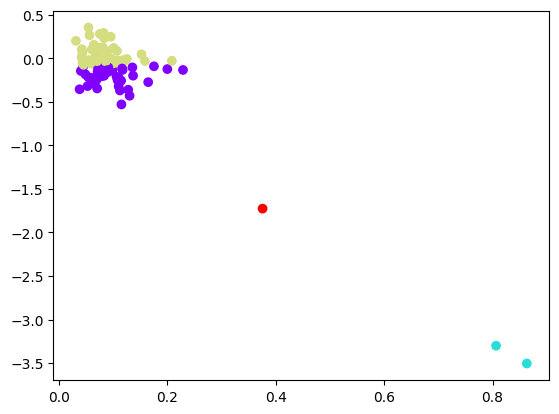

In [48]:
#KMeans Clustering durchführen
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

In [49]:
Company = pd.DataFrame(df_vol_return.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df_cluster = pd.concat([Company, cluster_labels],axis = 1)

In [50]:
df_cluster.head(10)

security_name  0
0              AIA Group Limited  2
1                ASML Holding NV  2
2                      AT&T Inc.  0
3                   AbbVie, Inc.  2
4            Abbott Laboratories  0
5          Accenture Plc Class A  0
6             Adobe Incorporated  0
7   Advanced Micro Devices, Inc.  0
8  Alibaba Group Holding Limited  0
9          Alphabet Inc. Class A  1

#### SDG Übersicht Benchmark und Sektoren

In [51]:
##Wirkungsmessung @Marco
#Dataframe mit Sektoren, 3 Spalten: jobs, co2, fin pro 1Mio firmenwert
index_USDM = len(df_base_data)
index_jobs = (df_base_data['jobs_delta_perUSDM'].sum()) / index_USDM
index_co2 = (df_base_data['CO2_delta_perUSDM'].sum()) / index_USDM
index_fin = (df_base_data['fin_delta_perUSDM'].sum()) / index_USDM
print(index_USDM, index_jobs, index_co2, index_fin)


99 -0.019659933016152344 -1.049742942037269 6.431981391136047


In [52]:
dfsdg_country_select = df_base_data

In [53]:
dfsdg_country_piv = dfsdg_country_select.pivot_table(index='security_country', values=['CO2_delta_perUSDM', 'fin_delta_perUSDM', 'jobs_delta_perUSDM'], aggfunc= 'sum')

df_isin_count = dfsdg_country_select.pivot_table(index='security_country', values='security_isin', aggfunc='count')

dfsdg_country_pivot = pd.merge(dfsdg_country_piv, df_isin_count, on='security_country')

dfsdg_country_pivot.head(5)

CO2_delta_perUSDM  fin_delta_perUSDM  jobs_delta_perUSDM  \
security_country                                                             
Australia                    -28.37               0.00                0.05   
Canada                        -0.55               0.00                0.02   
Cayman Islands                18.70               0.00               -0.02   
Denmark                       -0.31               0.00               -0.16   
France                         6.96               0.00                0.01   

                  security_isin  
security_country                 
Australia                     2  
Canada                        2  
Cayman Islands                2  
Denmark                       1  
France                        3

In [54]:
dfsdg_country = dfsdg_country_pivot.reset_index()
dfsdg_country['security_isin'] = dfsdg_country['security_isin'].astype(float)
dfsdg_country.dtypes

security_country       object
CO2_delta_perUSDM     float64
fin_delta_perUSDM     float64
jobs_delta_perUSDM    float64
security_isin         float64
dtype: object

In [55]:
#Spalten umbenennen
new_column_names = {
    'CO2_delta_perUSDM': 'CO2_delta_perUSDM1',
    'fin_delta_perUSDM': 'fin_delta_perUSDM1',
    'jobs_delta_perUSDM': 'jobs_delta_perUSDM1',
}

dfsdg_country = dfsdg_country.rename(columns=new_column_names)

#Normalisierung Werte auf USDM
dfsdg_country['CO2_delta_perUSDM'] = dfsdg_country['CO2_delta_perUSDM1'] / dfsdg_country['security_isin']
dfsdg_country['fin_delta_perUSDM'] = dfsdg_country['fin_delta_perUSDM1'] / dfsdg_country['security_isin']
dfsdg_country['jobs_delta_perUSDM'] = dfsdg_country['jobs_delta_perUSDM1'] / dfsdg_country['security_isin']

#Ursprüngliche Spalten wieder löschen
dfsdg_country = dfsdg_country.drop(['CO2_delta_perUSDM1', 'fin_delta_perUSDM1', 'jobs_delta_perUSDM1'], axis=1)

dfsdg_country.head()

security_country  security_isin  CO2_delta_perUSDM  fin_delta_perUSDM  \
0        Australia           2.00             -14.18               0.00   
1           Canada           2.00              -0.28               0.00   
2   Cayman Islands           2.00               9.35               0.00   
3          Denmark           1.00              -0.31               0.00   
4           France           3.00               2.32               0.00   

   jobs_delta_perUSDM  
0                0.03  
1                0.01  
2               -0.01  
3               -0.16  
4                0.00

In [56]:
dfsdg_sector_piv = dfsdg_country_select.pivot_table(index='company_sector', values=['CO2_delta_perUSDM', 'fin_delta_perUSDM', 'jobs_delta_perUSDM'], aggfunc= 'sum')

df_isin_count1 = dfsdg_country_select.pivot_table(index='company_sector', values='security_isin', aggfunc='count')

dfsdg_sector_pivot = pd.merge(dfsdg_sector_piv, df_isin_count1, on='company_sector')

dfsdg_sector_pivot.head(5)

CO2_delta_perUSDM  fin_delta_perUSDM  \
company_sector                                                 
Consumer Cyclicals                  -5.49               0.00   
Consumer Non-Cyclicals               5.78               0.00   
Consumer Services                    1.81               0.00   
Energy                             -82.09               0.00   
Finance                              7.79             636.77   

                        jobs_delta_perUSDM  security_isin  
company_sector                                             
Consumer Cyclicals                    0.34              6  
Consumer Non-Cyclicals                0.50             11  
Consumer Services                    -3.68              3  
Energy                               -0.08              6  
Finance                               0.03             16

In [57]:
dfsdg_sector = dfsdg_sector_pivot.reset_index()
dfsdg_sector['security_isin'] = dfsdg_sector['security_isin'].astype(float)
dfsdg_sector.dtypes

company_sector         object
CO2_delta_perUSDM     float64
fin_delta_perUSDM     float64
jobs_delta_perUSDM    float64
security_isin         float64
dtype: object

In [58]:
#Spalten umbenennen
new_column_names = {
    'CO2_delta_perUSDM': 'CO2_delta_perUSDM1',
    'fin_delta_perUSDM': 'fin_delta_perUSDM1',
    'jobs_delta_perUSDM': 'jobs_delta_perUSDM1',
}

dfsdg_sector = dfsdg_sector.rename(columns=new_column_names)

#Normalisierung Werte auf USDM
dfsdg_sector['CO2_delta_perUSDM'] = dfsdg_sector['CO2_delta_perUSDM1'] / dfsdg_sector['security_isin']
dfsdg_sector['fin_delta_perUSDM'] = dfsdg_sector['fin_delta_perUSDM1'] / dfsdg_sector['security_isin']
dfsdg_sector['jobs_delta_perUSDM'] = dfsdg_sector['jobs_delta_perUSDM1'] / dfsdg_sector['security_isin']

#Ursprüngliche Spalten wieder löschen
dfsdg_sector = dfsdg_sector.drop(['CO2_delta_perUSDM1', 'fin_delta_perUSDM1', 'jobs_delta_perUSDM1'], axis=1)

dfsdg_sector.head(25)

company_sector  security_isin  CO2_delta_perUSDM  \
0       Consumer Cyclicals           6.00              -0.92   
1   Consumer Non-Cyclicals          11.00               0.53   
2        Consumer Services           3.00               0.60   
3                   Energy           6.00             -13.68   
4                  Finance          16.00               0.49   
5               Healthcare          17.00              -0.11   
6              Industrials           9.00              -0.61   
7     Non-Energy Materials           2.00              -9.53   
8               Technology          25.00               0.68   
9       Telecommunications           3.00              -2.69   
10               Utilities           1.00             -14.30   

    fin_delta_perUSDM  jobs_delta_perUSDM  
0                0.00                0.06  
1                0.00                0.05  
2                0.00               -1.23  
3                0.00               -0.01  
4               39.80                0.00  
5                0.00                0.02  
6                0.00                0.07  
7                0.00                0.00  
8                0.00                0.01  
9                0.00               -0.05  
10               0.00                0.00

#### SDG Wirkungsmessung (Universum und Zufallsportfolio)

In einem ersten Schritt soll die Wirkungsmessung per 1 Mio USD für das gesamte Universum berechnet werden

In [59]:
#Select für alle SDG Daten + ISIN, Name und Marktwert

# Verbindung zu Market_Data.db
connection = sqlite3.connect("Market_Data.db")

# Select
dfsdg_index = pd.read_sql("""
    SELECT
        sdg.security_isin,
        security.security_name,
        sdg.company_entitynr,
        sdg.jobs_Absolute_T,
        sdg.CO2_Absolute_T,
        sdg.fin_Absolute_T,
        sdg.jobs_delta_perUSDM,
        sdg.CO2_delta_perUSDM,
        sdg.fin_delta_perUSDM
    FROM
        sdg
    INNER JOIN
        security ON sdg.security_isin = security.security_isin
""", connection)

connection.close

dfsdg_index.head()

security_isin                 security_name company_entitynr  \
0  US0028241000           Abbott Laboratories              542   
1  US00287Y1091                  AbbVie, Inc.              648   
2  IE00B4BNMY34         Accenture Plc Class A              200   
3  US00724F1012            Adobe Incorporated              649   
4  US0079031078  Advanced Micro Devices, Inc.              650   

   jobs_Absolute_T  CO2_Absolute_T  fin_Absolute_T  jobs_delta_perUSDM  \
0        113000.00       930000.00            0.00                0.02   
1         50000.00       625000.00            0.00                0.01   
2        721000.00        26160.00            0.00                0.53   
3         25988.00        35383.00            0.00                0.02   
4         15500.00        24624.00            0.00                0.03   

   CO2_delta_perUSDM  fin_delta_perUSDM  
0               0.16               0.00  
1               0.39               0.00  
2              -0.30               0.00  
3              -0.05               0.00  
4              -0.08               0.00

In [60]:
# Berechnen Impact per 1 Mio. USD
index_USDM = len(dfsdg_index)
index_jobs = (dfsdg_index['jobs_delta_perUSDM'].sum()) / index_USDM
index_co2 = (dfsdg_index['CO2_delta_perUSDM'].sum()) / index_USDM
index_fin = (dfsdg_index['fin_delta_perUSDM'].sum()) / index_USDM

# Print the results
print("Veränderung Jobs: ", index_jobs)
print("Veränderung Co2: ", index_co2)
print("Veränderung Finanzdl. ", index_fin)

Veränderung Jobs:  -0.019659933016152344
Veränderung Co2:  -1.049742942037269
Veränderung Finanzdl.  6.431981391136047


In [61]:
#Dataframe aus Resulaten Benchmark erstellen
data = {
    'Metrics': ['Veränderung Jobs', 'Veränderung Co2', 'Veränderung Finanzdl.'],
    'Values': [index_jobs, index_co2, index_fin]
}

df_sdg_impact_bm = pd.DataFrame(data)


print(df_sdg_impact_bm)

                 Metrics  Values
0       Veränderung Jobs   -0.02
1        Veränderung Co2   -1.05
2  Veränderung Finanzdl.    6.43


Nun soll die Berechnung für ein Zufallsportfolio durchgeführt werden

In [62]:
#ISIN Nummern selektieren
connection = sqlite3.connect("Market_Data.db")

dfport_random_select = pd.read_sql("""
    SELECT
        security.security_isin
    FROM
        security
""", connection)

connection.close

print(dfport_random_select.head())
print(len(dfport_random_select))

  security_isin
0  AU000000BHP4
1  AU000000CBA7
2  CA7800871021
3  CA8911605092
4  CH0012005267
99


In [63]:
dfport_random_sample = dfport_random_select.sample(n=20, random_state=40)
print(dfport_random_sample.head(10))
print(len(dfport_random_sample))

   security_isin
51  US22160K1051
80  US7181721090
45  US1491231015
15  GB0009895292
67  US5486611073
11  FR0000120578
39  US0378331005
64  US4781601046
38  US0367521038
61  US4581401001
20


In [64]:
port_random = dfport_random_sample['security_isin'].tolist()
port_random_sql = ', '.join([f"'{value}'" for value in port_random])
print(port_random)
print(port_random_sql)
print(len(port_random))
print(len(port_random_sql))

['US22160K1051', 'US7181721090', 'US1491231015', 'GB0009895292', 'US5486611073', 'FR0000120578', 'US0378331005', 'US4781601046', 'US0367521038', 'US4581401001', 'US1912161007', 'CH0012005267', 'US4592001014', 'TW0002330008', 'US6174464486', 'GB00BP6MXD84', 'US7134481081', 'US02079K1079', 'DK0060534915', 'US9311421039']
'US22160K1051', 'US7181721090', 'US1491231015', 'GB0009895292', 'US5486611073', 'FR0000120578', 'US0378331005', 'US4781601046', 'US0367521038', 'US4581401001', 'US1912161007', 'CH0012005267', 'US4592001014', 'TW0002330008', 'US6174464486', 'GB00BP6MXD84', 'US7134481081', 'US02079K1079', 'DK0060534915', 'US9311421039'
20
318


In [65]:
# Verbindung zu Market_Data.db
connection = sqlite3.connect('Market_Data.db')

#query
query = """
    SELECT
        sdg.security_isin,
        security.security_name,
        sdg.company_entitynr,
        sdg.jobs_delta_perUSDM,
        sdg.CO2_delta_perUSDM,
        sdg.fin_delta_perUSDM
    FROM
        sdg
    INNER JOIN
        security ON sdg.security_isin = security.security_isin
    WHERE
        sdg.security_isin IN ({})
""".format(port_random_sql)

# query ausführen
dfport_random = pd.read_sql(query, connection,)

connection.close

<function Connection.close()>

In [66]:
dfport_random.head()

security_isin                 security_name company_entitynr  \
0  US02079K1079         Alphabet Inc. Class A              434   
1  US0378331005                    Apple Inc.              438   
2  GB0009895292               AstraZeneca PLC              551   
3  US1491231015              Caterpillar Inc.              116   
4  US22160K1051  Costco Wholesale Corporation              223   

   jobs_delta_perUSDM  CO2_delta_perUSDM  fin_delta_perUSDM  
0                0.02               0.81               0.00  
1                0.00              -0.02               0.00  
2                0.03              -0.02               0.00  
3                0.08               0.32               0.00  
4                0.07             -11.24               0.00

In [67]:
print(len(dfport_random))

20


In [68]:
dfport_random_USDM = len(dfport_random)
dfport_random_USDM_jobs = (dfport_random['jobs_delta_perUSDM'].sum()) / dfport_random_USDM
dfport_random_USDM_co2 = (dfport_random['CO2_delta_perUSDM'].sum()) / dfport_random_USDM
dfport_random_USDM_fin = (dfport_random['fin_delta_perUSDM'].sum()) / dfport_random_USDM

# Print the results
print("Veränderung Jobs: ", dfport_random_USDM_jobs)
print("Veränderung Co2: ", dfport_random_USDM_co2)
print("Veränderung Finanzdl. ", dfport_random_USDM_fin)

Veränderung Jobs:  -0.0004631941742446981
Veränderung Co2:  -1.4891204331840107
Veränderung Finanzdl.  0.0


In [69]:
#Dataframe aus Resulaten Portfolio erstellen
data = {
    'Metrics': ['Veränderung Jobs', 'Veränderung Co2', 'Veränderung Finanzdl.'],
    'Values': [dfport_random_USDM_jobs, dfport_random_USDM_co2, dfport_random_USDM_fin]
}

df_sdg_impact = pd.DataFrame(data)


print(df_sdg_impact)

                 Metrics  Values
0       Veränderung Jobs   -0.00
1        Veränderung Co2   -1.49
2  Veränderung Finanzdl.    0.00


#### SDG vs Rendite Kennzahlen

In [70]:
#Select für alle SDG Daten + ISIN, Name, Marktwert, Land und Sektor

# Verbindung zu Market_Data.db
connection = sqlite3.connect("Market_Data.db")

# Select
dfsdg_comp_select = pd.read_sql("""
    SELECT
        sdg.security_isin,
        security.security_name,
        security.security_country,
        sdg.jobs_delta_perUSDM,
        sdg.CO2_delta_perUSDM,
        sdg.fin_delta_perUSDM
    FROM
        sdg
    INNER JOIN
        security ON sdg.security_isin = security.security_isin
""", connection)

connection.close

dfsdg_comp_select.head()

security_isin                 security_name security_country  \
0  US0028241000           Abbott Laboratories              USA   
1  US00287Y1091                  AbbVie, Inc.              USA   
2  IE00B4BNMY34         Accenture Plc Class A          Ireland   
3  US00724F1012            Adobe Incorporated              USA   
4  US0079031078  Advanced Micro Devices, Inc.              USA   

   jobs_delta_perUSDM  CO2_delta_perUSDM  fin_delta_perUSDM  
0                0.02               0.16               0.00  
1                0.01               0.39               0.00  
2                0.53              -0.30               0.00  
3                0.02              -0.05               0.00  
4                0.03              -0.08               0.00

Jobs vs Rendite

In [71]:
dfsdg_jobs = dfsdg_comp_select.drop(['security_isin', 'security_country', 'CO2_delta_perUSDM', 'fin_delta_perUSDM'], axis=1)
dfsdg_jobs.head()

security_name  jobs_delta_perUSDM
0           Abbott Laboratories                0.02
1                  AbbVie, Inc.                0.01
2         Accenture Plc Class A                0.53
3            Adobe Incorporated                0.02
4  Advanced Micro Devices, Inc.                0.03

In [72]:
dfsdg_jobs_return = pd.merge(dfsdg_jobs, dflog_y_return, on= 'security_name', how= 'inner')
dfsdg_jobs_return.head()

security_name  jobs_delta_perUSDM  returns
0           Abbott Laboratories                0.02    -0.18
1                  AbbVie, Inc.                0.01    -0.03
2         Accenture Plc Class A                0.53    -0.21
3            Adobe Incorporated                0.02    -0.20
4  Advanced Micro Devices, Inc.                0.03    -0.12

In [73]:
dfsdg_jobs_return['constant'] = 1

# Perform OLS regression
X = dfsdg_jobs_return[['constant', 'jobs_delta_perUSDM']]  # Independent variables
y = dfsdg_jobs_return['returns']  # Dependent variable
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9812
Date:                Fri, 16 Jun 2023   Prob (F-statistic):              0.324
Time:                        23:37:59   Log-Likelihood:                -90.649
No. Observations:                  99   AIC:                             185.3
Df Residuals:                      97   BIC:                             190.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              -0.1886      0

In [74]:
dfsdg_jobs_return['predicted_returns'] = results.predict()

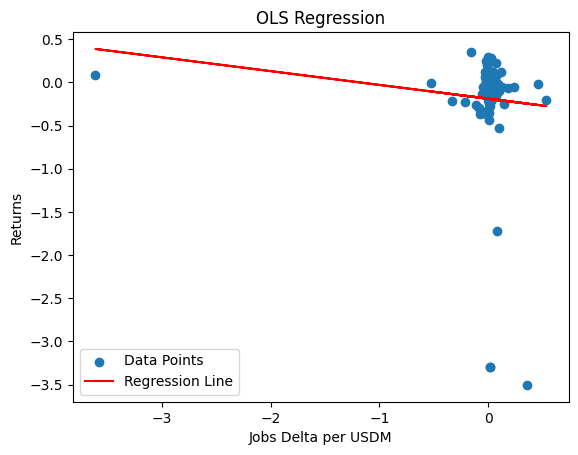

In [75]:
plt.scatter(dfsdg_jobs_return['jobs_delta_perUSDM'], dfsdg_jobs_return['returns'], label='Data Points')
plt.plot(dfsdg_jobs_return['jobs_delta_perUSDM'], dfsdg_jobs_return['predicted_returns'], color='red', label='Regression Line')
plt.xlabel('Jobs Delta per USDM')
plt.ylabel('Returns')
plt.title('OLS Regression')
plt.legend()
plt.show()

Co2 vs. Rendite

In [76]:
dfsdg_co2 = dfsdg_comp_select.drop(['security_isin', 'security_country', 'jobs_delta_perUSDM', 'fin_delta_perUSDM'], axis=1)
dfsdg_co2.head()

security_name  CO2_delta_perUSDM
0           Abbott Laboratories               0.16
1                  AbbVie, Inc.               0.39
2         Accenture Plc Class A              -0.30
3            Adobe Incorporated              -0.05
4  Advanced Micro Devices, Inc.              -0.08

In [77]:
dfsdg_co2_return = pd.merge(dfsdg_co2, dflog_y_return, on= 'security_name', how= 'inner')
dfsdg_co2_return.head()

security_name  CO2_delta_perUSDM  returns
0           Abbott Laboratories               0.16    -0.18
1                  AbbVie, Inc.               0.39    -0.03
2         Accenture Plc Class A              -0.30    -0.21
3            Adobe Incorporated              -0.05    -0.20
4  Advanced Micro Devices, Inc.              -0.08    -0.12

In [78]:
dfsdg_co2_return['constant'] = 1

# Perform OLS regression
X = dfsdg_co2_return[['constant', 'CO2_delta_perUSDM']]  # Independent variables
y = dfsdg_co2_return['returns']  # Dependent variable
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7030
Date:                Fri, 16 Jun 2023   Prob (F-statistic):              0.404
Time:                        23:37:59   Log-Likelihood:                -90.789
No. Observations:                  99   AIC:                             185.6
Df Residuals:                      97   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant             -0.1904      0.06

In [79]:
dfsdg_co2_return['predicted_returns'] = results.predict()

In [80]:
plt.scatter(dfsdg_co2_return['CO2_delta_perUSDM'], dfsdg_co2_return['returns'], label='Data Points')
plt.plot(dfsdg_co2_return['CO2_delta_perUSDM'], dfsdg_co2_return['predicted_returns'], color='red', label='Regression Line')
plt.xlabel('CO2 Delta per USDM')
plt.ylabel('Returns')
plt.title('OLS Regression')
plt.legend()
plt.show()

Jobs vs CO2

In [81]:
dfsdg_co2_jobs = pd.merge(dfsdg_jobs, dfsdg_co2, on= 'security_name', how= 'inner')
dfsdg_co2_jobs.head()

security_name  jobs_delta_perUSDM  CO2_delta_perUSDM
0           Abbott Laboratories                0.02               0.16
1                  AbbVie, Inc.                0.01               0.39
2         Accenture Plc Class A                0.53              -0.30
3            Adobe Incorporated                0.02              -0.05
4  Advanced Micro Devices, Inc.                0.03              -0.08

In [82]:
dfsdg_co2_jobs['constant'] = 1

# Perform OLS regression
X = dfsdg_co2_jobs[['constant', 'jobs_delta_perUSDM']]  # Independent variables
y = dfsdg_co2_jobs['CO2_delta_perUSDM']  # Dependent variable
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      CO2_delta_perUSDM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.002608
Date:                Fri, 16 Jun 2023   Prob (F-statistic):              0.959
Time:                        23:38:00   Log-Likelihood:                -384.68
No. Observations:                 101   AIC:                             773.4
Df Residuals:                      99   BIC:                             778.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              -1.0101      1

In [83]:
dfsdg_co2_jobs['predicted_CO2'] = results.predict()

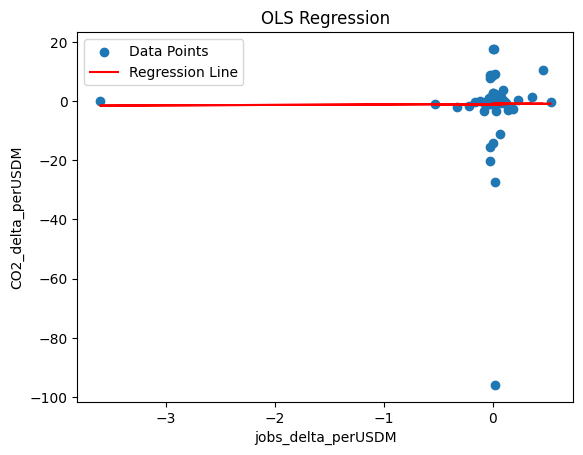

In [84]:
plt.scatter(dfsdg_co2_jobs['jobs_delta_perUSDM'], dfsdg_co2_jobs['CO2_delta_perUSDM'], label='Data Points')
plt.plot(dfsdg_co2_jobs['jobs_delta_perUSDM'], dfsdg_co2_jobs['predicted_CO2'], color='red', label='Regression Line')
plt.xlabel('jobs_delta_perUSDM')
plt.ylabel('CO2_delta_perUSDM')
plt.title('OLS Regression')
plt.legend()
plt.show()

Return vs. Jobs vs. CO2

In [85]:
dfsdg_jobs_co2_1 = pd.merge(dfsdg_jobs, dfsdg_co2, on= 'security_name', how= 'inner')
dfsdg_jobs_co2_return = pd.merge(dfsdg_jobs_co2_1, dflog_y_return, on= 'security_name', how= 'inner')

dfsdg_jobs_co2_return.head()
#print(dfsdg_jobs_co2_return)

security_name  jobs_delta_perUSDM  CO2_delta_perUSDM  \
0           Abbott Laboratories                0.02               0.16   
1                  AbbVie, Inc.                0.01               0.39   
2         Accenture Plc Class A                0.53              -0.30   
3            Adobe Incorporated                0.02              -0.05   
4  Advanced Micro Devices, Inc.                0.03              -0.08   

   returns  
0    -0.18  
1    -0.03  
2    -0.21  
3    -0.20  
4    -0.12

In [86]:
# Perform multiple regression
X = dfsdg_jobs_co2_return[['jobs_delta_perUSDM', 'CO2_delta_perUSDM']]
y = dfsdg_jobs_co2_return['returns']

X = sm.add_constant(X)  # Add a constant column for the intercept
model = sm.OLS(y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      CO2_delta_perUSDM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.002608
Date:                Fri, 16 Jun 2023   Prob (F-statistic):              0.959
Time:                        23:38:00   Log-Likelihood:                -384.68
No. Observations:                 101   AIC:                             773.4
Df Residuals:                      99   BIC:                             778.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              -1.0101      1

In [87]:
plt.scatter(dfsdg_jobs_co2_return['jobs_delta_perUSDM'], dfsdg_jobs_co2_return['returns'], label='Data Points')
plt.plot(dfsdg_jobs_co2_return['jobs_delta_perUSDM'], model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('jobs_delta_perUSDM')
plt.ylabel('returns')
plt.title('Multiple Regression')
plt.legend()
plt.show()

Obenstehende Regression ist nicht aussagekräftigt und wird nicht weiter berücksichtigt.

### Fazit zu Datenqualität
Nach der ersten Untersuchung wurde festgestellt, dass bei 3 Aktien die Kursentwicklung nicht korrekt sein kann. Dies ist auf ein Aktiensplit zurückzuführen. Zudem gibt es bei den Nachhaltigkeitswerten auch Aussreisser bei den Daten. Im Nachfolgenden Kapitel werden diese Daten bereinigt und gewisse Analysen nocheinmal durchgeführt.  


### Datenset bereinigen

Rendite Dataframe

In [88]:
print(dflog_y_return.head())
print(dflog_y_return.info())

         security_name  returns
0    AIA Group Limited    -0.02
1      ASML Holding NV    -0.01
2            AT&T Inc.    -0.22
3         AbbVie, Inc.    -0.03
4  Abbott Laboratories    -0.18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   security_name  98 non-null     object 
 1   returns        98 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [89]:
#höchste und tiefste Werte anzeigen
highest_values = dflog_y_return['returns'].nlargest(5)
lowest_values = dflog_y_return['returns'].nsmallest(5)

print(highest_values)
print(lowest_values)


61   0.35
36   0.29
16   0.28
51   0.26
35   0.25
Name: returns, dtype: float64
10   -3.50
9    -3.30
83   -1.73
41   -0.53
23   -0.43
Name: returns, dtype: float64


In [90]:
#Ausreisser löschen
dflog_y_return = dflog_y_return.drop([10,9,83], axis=0)

In [91]:
#Kontrolle Datenlöschung
highest_values = dflog_y_return['returns'].nlargest(5)
lowest_values = dflog_y_return['returns'].nsmallest(5)

print(highest_values)
print(lowest_values)

61   0.35
36   0.29
16   0.28
51   0.26
35   0.25
Name: returns, dtype: float64
41   -0.53
23   -0.43
17   -0.37
96   -0.36
70   -0.36
Name: returns, dtype: float64


Jobs Dataframe

In [92]:
dfsdg_jobs = dfsdg_comp_select.drop(['security_isin', 'security_country', 'CO2_delta_perUSDM', 'fin_delta_perUSDM'], axis=1)
dfsdg_jobs.head()

security_name  jobs_delta_perUSDM
0           Abbott Laboratories                0.02
1                  AbbVie, Inc.                0.01
2         Accenture Plc Class A                0.53
3            Adobe Incorporated                0.02
4  Advanced Micro Devices, Inc.                0.03

In [93]:
#höchste und tiefste Werte anzeigen
highest_values = dfsdg_jobs['jobs_delta_perUSDM'].nlargest(5)
lowest_values = dfsdg_jobs['jobs_delta_perUSDM'].nsmallest(5)

print(highest_values)
print(lowest_values)

2    0.53
66   0.46
9    0.36
87   0.23
45   0.18
Name: jobs_delta_perUSDM, dtype: float64
77   -3.61
40   -0.53
65   -0.33
15   -0.21
58   -0.16
Name: jobs_delta_perUSDM, dtype: float64


In [94]:
#Ausreisser löschen
dfsdg_jobs = dfsdg_jobs.drop([77], axis=0)

In [95]:
#Kontrolle Datenlöschung
highest_values = dfsdg_jobs['jobs_delta_perUSDM'].nlargest(5)
lowest_values = dfsdg_jobs['jobs_delta_perUSDM'].nsmallest(5)

print(highest_values)
print(lowest_values)

2    0.53
66   0.46
9    0.36
87   0.23
45   0.18
Name: jobs_delta_perUSDM, dtype: float64
40   -0.53
65   -0.33
15   -0.21
58   -0.16
98   -0.12
Name: jobs_delta_perUSDM, dtype: float64


CO2 Dataframe

In [96]:
dfsdg_co2 = dfsdg_comp_select.drop(['security_isin', 'security_country', 'jobs_delta_perUSDM', 'fin_delta_perUSDM'], axis=1)
dfsdg_co2.head()

security_name  CO2_delta_perUSDM
0           Abbott Laboratories               0.16
1                  AbbVie, Inc.               0.39
2         Accenture Plc Class A              -0.30
3            Adobe Incorporated              -0.05
4  Advanced Micro Devices, Inc.              -0.08

In [97]:
#höchste und tiefste Werte anzeigen
highest_values = dfsdg_co2['CO2_delta_perUSDM'].nlargest(5)
lowest_values = dfsdg_co2['CO2_delta_perUSDM'].nsmallest(5)

print(highest_values)
print(lowest_values)

27   17.66
6    17.53
66   10.53
17    9.18
23    8.73
Name: CO2_delta_perUSDM, dtype: float64
19   -95.87
18   -27.45
69   -20.30
37   -15.49
55   -14.30
Name: CO2_delta_perUSDM, dtype: float64


In [98]:
dfsdg_co2 = dfsdg_co2.drop([19], axis=0)

In [99]:
#Kontrolle Datenlöschung
highest_values = dfsdg_co2['CO2_delta_perUSDM'].nlargest(5)
lowest_values = dfsdg_co2['CO2_delta_perUSDM'].nsmallest(5)

print(highest_values)
print(lowest_values)

27   17.66
6    17.53
66   10.53
17    9.18
23    8.73
Name: CO2_delta_perUSDM, dtype: float64
18   -27.45
69   -20.30
37   -15.49
55   -14.30
28   -11.24
Name: CO2_delta_perUSDM, dtype: float64


Somit sind die Dataframes für Rendite, Jobs und Co2 um Ausreisser bereinigt

### Tests mit bereinigtem Datenset

Gewisse Tests werden nun mit dem bereinigtem Datenset wiederholt.

#### Rendite V2

In [100]:
df_vol_return = pd.merge(dflog_y_return, dfstd, on= 'security_name', how= 'inner')
df_vol_return.set_index('security_name', inplace=True)
df_vol_return.head()

returns  volatility
security_name                           
AIA Group Limited      -0.02        0.11
ASML Holding NV        -0.01        0.13
AT&T Inc.              -0.22        0.11
AbbVie, Inc.           -0.03        0.06
Abbott Laboratories    -0.18        0.05

In [101]:
df_vol_return.info

<bound method DataFrame.info of                              returns  volatility
security_name                                   
AIA Group Limited              -0.02        0.11
ASML Holding NV                -0.01        0.13
AT&T Inc.                      -0.22        0.11
AbbVie, Inc.                   -0.03        0.06
Abbott Laboratories            -0.18        0.05
...                              ...         ...
Verizon Communications Inc.    -0.29        0.07
Visa Inc. Class A               0.00        0.08
Walmart Inc.                   -0.03        0.07
Walt Disney Company            -0.36        0.13
Wells Fargo & Company          -0.26        0.12

[95 rows x 2 columns]>

In [102]:
#Umkehr Spalten für Clustering
df_vol_return_cluster = df_vol_return[['volatility', 'returns']]
df_vol_return.head()

returns  volatility
security_name                           
AIA Group Limited      -0.02        0.11
ASML Holding NV        -0.01        0.13
AT&T Inc.              -0.22        0.11
AbbVie, Inc.           -0.03        0.06
Abbott Laboratories    -0.18        0.05

In [103]:
X =  df_vol_return_cluster.values #In numpy array konvertieren
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
pl.plot(range(2,15), sse)
pl.title("Elbow Curve")
pl.show()

In [104]:
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

In [105]:
Company = pd.DataFrame(df_vol_return.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df_cluster = pd.concat([Company, cluster_labels],axis = 1)

In [106]:
df_cluster.head()

security_name  0
0    AIA Group Limited  0
1      ASML Holding NV  0
2            AT&T Inc.  1
3         AbbVie, Inc.  0
4  Abbott Laboratories  1

In [107]:
df_vol_return_reg = df_vol_return.reset_index()
df_vol_return_reg.head()

security_name  returns  volatility
0    AIA Group Limited    -0.02        0.11
1      ASML Holding NV    -0.01        0.13
2            AT&T Inc.    -0.22        0.11
3         AbbVie, Inc.    -0.03        0.06
4  Abbott Laboratories    -0.18        0.05

In [108]:
df_vol_return_reg['constant'] = 1

# Perform OLS regression
X = df_vol_return_reg[['constant', 'volatility']]  # Independent variables
y = df_vol_return_reg['returns']  # Dependent variable
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.371
Date:                Fri, 16 Jun 2023   Prob (F-statistic):             0.0393
Time:                        23:38:04   Log-Likelihood:                 40.912
No. Observations:                  95   AIC:                            -77.82
Df Residuals:                      93   BIC:                            -72.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0134      0.043      0.315      0.7

In [109]:
df_vol_return_reg['predicted_returns'] = results.predict()

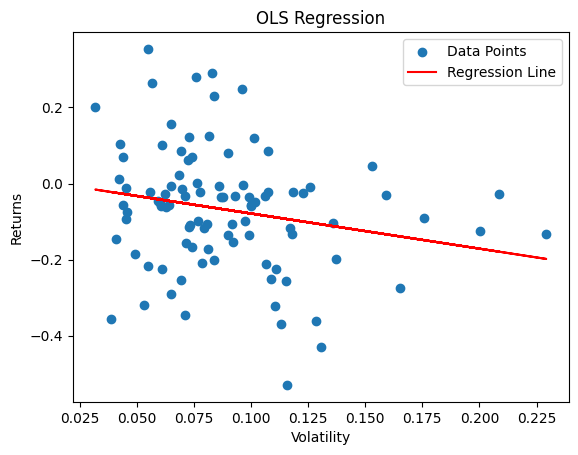

In [110]:
plt.scatter(df_vol_return_reg['volatility'], df_vol_return_reg['returns'], label='Data Points')
plt.plot(df_vol_return_reg['volatility'], df_vol_return_reg['predicted_returns'], color='red', label='Regression Line')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('OLS Regression')
plt.legend()
plt.show()

#### SDG vs Rendite V2

Jobs vs. Rendite V2

In [111]:
dfsdg_jobs_return = pd.merge(dfsdg_jobs, dflog_y_return, on= 'security_name', how= 'inner')
dfsdg_jobs_return.head()

security_name  jobs_delta_perUSDM  returns
0           Abbott Laboratories                0.02    -0.18
1                  AbbVie, Inc.                0.01    -0.03
2         Accenture Plc Class A                0.53    -0.21
3            Adobe Incorporated                0.02    -0.20
4  Advanced Micro Devices, Inc.                0.03    -0.12

In [112]:
dfsdg_jobs_return['constant'] = 1

# Perform OLS regression
X = dfsdg_jobs_return[['constant', 'jobs_delta_perUSDM']]  # Independent variables
y = dfsdg_jobs_return['returns']  # Dependent variable
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06191
Date:                Fri, 16 Jun 2023   Prob (F-statistic):              0.804
Time:                        23:38:05   Log-Likelihood:                 38.292
No. Observations:                  94   AIC:                            -72.58
Df Residuals:                      92   BIC:                            -67.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              -0.0699      0

In [113]:
dfsdg_jobs_return['predicted_returns'] = results.predict()

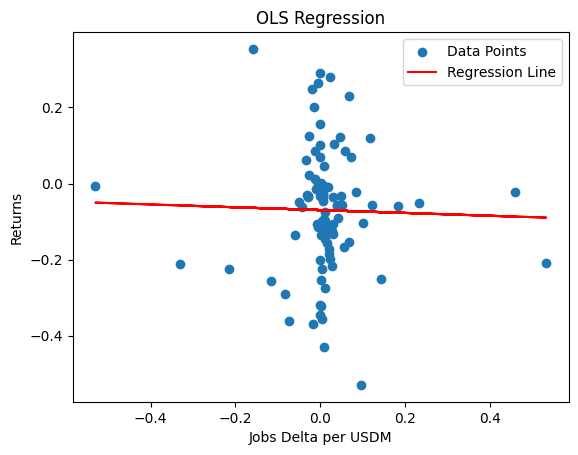

In [114]:
plt.scatter(dfsdg_jobs_return['jobs_delta_perUSDM'], dfsdg_jobs_return['returns'], label='Data Points')
plt.plot(dfsdg_jobs_return['jobs_delta_perUSDM'], dfsdg_jobs_return['predicted_returns'], color='red', label='Regression Line')
plt.xlabel('Jobs Delta per USDM')
plt.ylabel('Returns')
plt.title('OLS Regression')
plt.legend()
plt.show()

Co2 vs. Rendite V2

In [115]:
dfsdg_co2_return = pd.merge(dfsdg_co2, dflog_y_return, on= 'security_name', how= 'inner')
dfsdg_co2_return.head()

security_name  CO2_delta_perUSDM  returns
0           Abbott Laboratories               0.16    -0.18
1                  AbbVie, Inc.               0.39    -0.03
2         Accenture Plc Class A              -0.30    -0.21
3            Adobe Incorporated              -0.05    -0.20
4  Advanced Micro Devices, Inc.              -0.08    -0.12

In [116]:
dfsdg_co2_return['constant'] = 1

# Perform OLS regression
X = dfsdg_co2_return[['constant', 'CO2_delta_perUSDM']]  # Independent variables
y = dfsdg_co2_return['returns']  # Dependent variable
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06171
Date:                Fri, 16 Jun 2023   Prob (F-statistic):              0.804
Time:                        23:38:06   Log-Likelihood:                 40.258
No. Observations:                  94   AIC:                            -76.52
Df Residuals:                      92   BIC:                            -71.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant             -0.0724      0.01

In [117]:
dfsdg_co2_return['predicted_returns'] = results.predict()

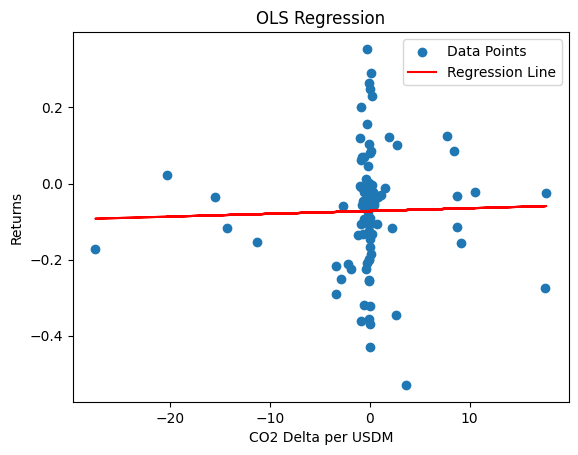

In [118]:
plt.scatter(dfsdg_co2_return['CO2_delta_perUSDM'], dfsdg_co2_return['returns'], label='Data Points')
plt.plot(dfsdg_co2_return['CO2_delta_perUSDM'], dfsdg_co2_return['predicted_returns'], color='red', label='Regression Line')
plt.xlabel('CO2 Delta per USDM')
plt.ylabel('Returns')
plt.title('OLS Regression')
plt.legend()
plt.show()

## CPA Step 4

In diesem Kapitel werden die aus der Analyse (CPA Step 3) gewonnenen Erkenntnisse präsentiert und die Fragestellungen aus dem 1. Kapitel (CPA Step 1) beantwortet.

####  Beschreibung des Benchmarkuniversums

Nachfolgend werden folgende Merkmale des Universums dargestellt:
- Asset Allocation (Verteilung nach der Art des Wertpapiers)
- Ländergewichte
- Sektorengewichte

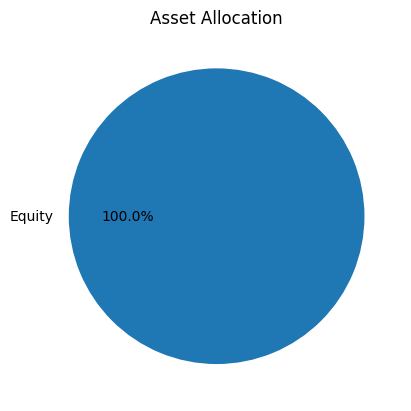

In [119]:
# Example dataframe

df = pd.DataFrame(asset_allocation_weights).reset_index()

# Create a pie plot
plt.pie(df['percentage_weights'], labels=df['asset_aloc_cat'], autopct='%1.1f%%')

# Add a title
plt.title('Asset Allocation')

# Display the plot
plt.show()

Das Portoflio dieser Case Study besteht zu 100% aus Aktien. Nachfolgend wird die Aufteilung nach Länder und Sektoren dargestellt.

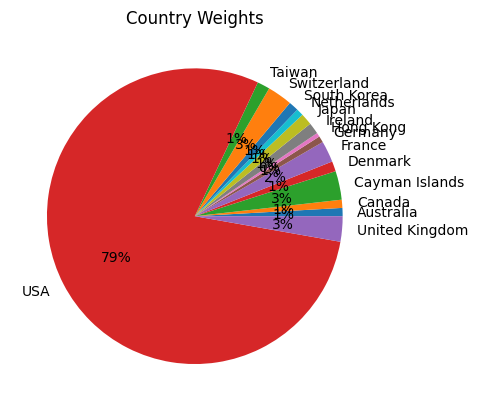

In [120]:
# Example dataframe

df = pd.DataFrame(country_weights).reset_index()

# Create a pie plot
plt.pie(df['percentage_weights'], labels=df['security_country'], autopct='%1.f%%')

# Add a title
plt.title('Country Weights')

# Display the plot
plt.show()


In [121]:
#Treemap Sektorgewichte

# mit Plotly
fig = px.treemap(df_base_data, path=['company_sector'], values='company_mktvalue')
fig.update_layout(title='Treemap using Plotly')
fig.show() #Wird nicht in html exportiert, da interaktiv

Das Untersuchungsobjekt besteht aus einem reinen Aktienportfolio. Aktien gelten als die ertragsreichste Anlageklasse, sind aber mit ensprechenden Risiken verbunden. Ob ein Anleger aus Risikooptik in ein reines Aktienportfolio investieren kann ist individuell zu betrachten, aber grundsätzlich vertretbar.  

Bei der Länderverteilung fällt der sehr hohe Anteil der USA auf (79.2%), während Deutschland einen Anteil hat von weniger als 1%.  

Bei den Sektoren hat der Bereich Technologie einen hohen Anteil von 40%. Auch Health Care (15.3%), Finance (12.4%) und Consumer Non-Cyclicals (12.2%) sind stark vertreten im Portfolio. Kaum vertreten ist der Bereich Utilities (0.6%). Der hohe Tech-Anteil erklärt teilweise auch den hohen US-Anteil, da die grossen Tech-Konzerte oft dort anzusiedeln sind.

####  Beschreibung der finanziellen Kennzahlen des Universums

In [122]:
#Scatterplot Rendite und Risiko Benchmarkuniversum

# Sample data
#x = np.array([1, 2, 3, 4, 5])
#y = np.array([2, 3, 5, 6, 8])

#data
x = np.array(df_vol_return["volatility"])
y = np.array(df_vol_return["returns"])

# Calculate regression line
reg_line = np.polyfit(x, y, 1)
reg_formula = f'y = {reg_line[0]:.2f}x + {reg_line[1]:.2f}'

# Create scatter plot
fig = px.scatter(x=x, y=y, trendline='ols')

# Add regression formula annotation
fig.add_annotation(x=0.3, y=0.5, text=reg_formula, showarrow=False)

# Show the plot
fig.show() #Wird nicht in html exportiert, da interaktiv


Marktlage, Tech
bei schlechter Marktlage tendenziel höhere Volatilität

####  SDG-Daten

Nachfolgend werden die im Benchmarkuniversum enthaltenen Sektoren bezüglich der SDG-Indikatoren betrachtet. Welche haben zum jeweiligen SDG einen positiven und welche einen negativen Beitrag geleistet?

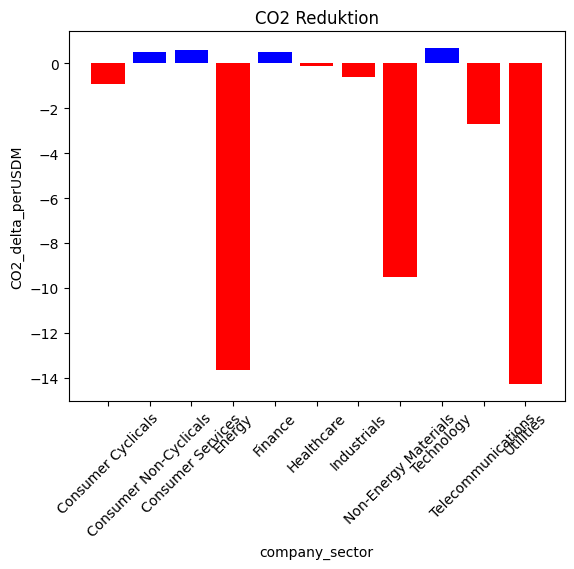

In [123]:


# Create a bar plot
colors = ['red' if val < 0 else 'blue' for val in dfsdg_sector['CO2_delta_perUSDM']]
plt.bar(dfsdg_sector['company_sector'], dfsdg_sector['CO2_delta_perUSDM'], color=colors)

# Customize the plot
plt.xlabel('company_sector')
plt.ylabel('CO2_delta_perUSDM')
plt.title('CO2 Reduktion')
plt.xticks(rotation=45)

# Show the plot
plt.show()


Sektoren, die generell einen hohen CO2-Ausstoss aufweisen, haben den Ausstoss deutlich reduziert (rote Balken). 4 Sektoren weisen sogar einen höheren Ausstoss aus (blauer Balken).

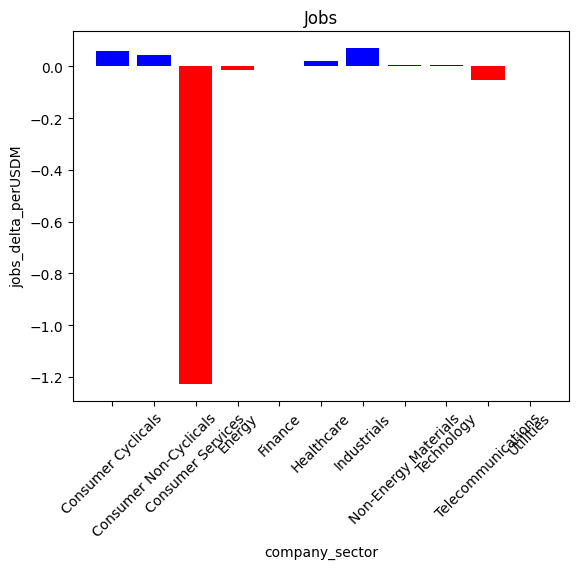

In [124]:
# Create a bar plot
colors = ['red' if val < 0 else 'blue' for val in dfsdg_sector['jobs_delta_perUSDM']]
plt.bar(dfsdg_sector['company_sector'], dfsdg_sector['jobs_delta_perUSDM'], color=colors)

# Customize the plot
plt.xlabel('company_sector')
plt.ylabel('jobs_delta_perUSDM')
plt.title('Jobs')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Sechs beobachtete Sektoren haben Jobs kreiert. Ein Sektor, nicht-zyklischer Konsum, hat deutlich Jobs abgebaut. In anbetracht des schlechten Börsenjahrs im beobachteten Zeitraum sind negative Zahlen durchaus zu erwarten. Das Ausmass im Bereich nicht-zyklischer Konsum überrascht und müsste in einer Folgeanalyse noch genauer angeschaut werden.

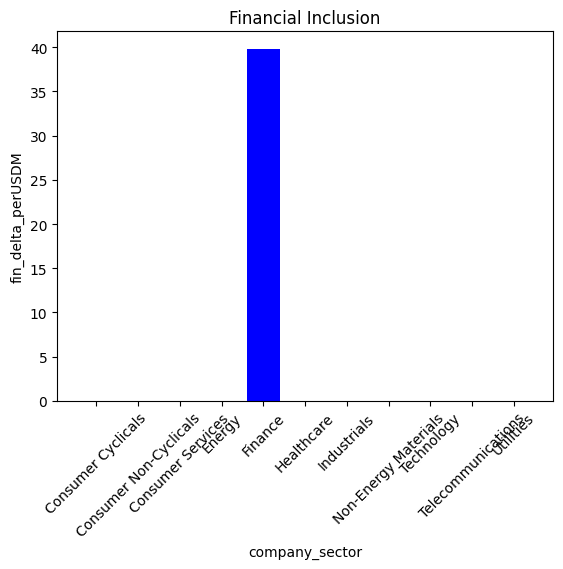

In [125]:
# Create a bar plot
colors = ['red' if val < 0 else 'blue' for val in dfsdg_sector['fin_delta_perUSDM']]
plt.bar(dfsdg_sector['company_sector'], dfsdg_sector['fin_delta_perUSDM'], color=colors)

# Customize the plot
plt.xlabel('company_sector')
plt.ylabel('fin_delta_perUSDM')
plt.title('Financial Inclusion')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Nur der Finanzsektor hat zu höherer Financial Inclusion beigetragen. Hier wird der Zugang zu Bankkonten und Geldautomaten sowie weiteren Finanzdienstleistungen angestrebt, welche traditionell vom Finanzsektor angeboten werden. Gerade der Tech-Sektor drängt immer mehr auch in diesen Sektor. In den vorliegenden Zahlen zeigt sich dies jedoch noch nicht.  

In der Tendenz haben die meisten Sektoren und Unternehmen im Benchmarkuniversum einen positiven Beitrag zu den SDG geleistet. Im nachfolgend Kapitel wird deren Wirkung noch vertieft.

####  Wirkungsmessung

Nachfolgend soll die Wirkungsmessung des Benchmark Universum und des Zufallsportfolio aufgezeigt werden. Die Werte sind auf eine Investition von 1 Mio USD normalisiert, damit sie verglichen werden können.

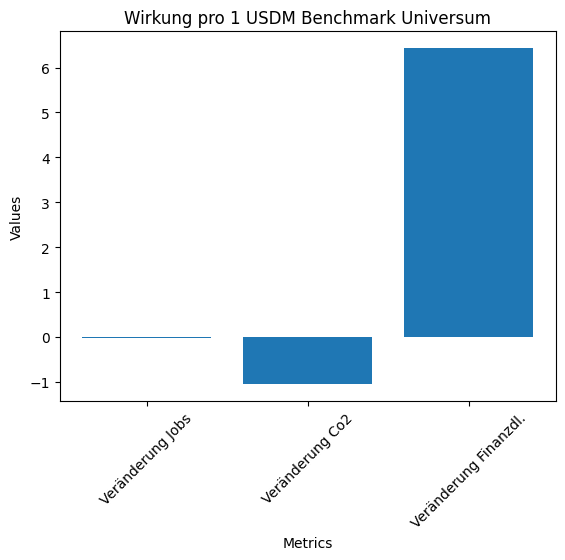

In [126]:
plt.bar(df_sdg_impact_bm['Metrics'], df_sdg_impact_bm['Values'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Wirkung pro 1 USDM Benchmark Universum')
plt.xticks(rotation=45)

plt.show()

Die Auswertung über den Beitrag des Benchmark zu den SDG Zielen zeigt auf dass pro 1 Mio USD Investition nahezu keine Stellen geschafften wurde. Erfreulich ist, dass ca. 1 Tonne Co2 gegenüber dem Vorjahr eingespart wurde. Zudem kamen 6 neue Personen in den Genuss von Finanzdienstleistungen. Dies ist vor allem auf die Finanzinstitute zurückzuführen. 

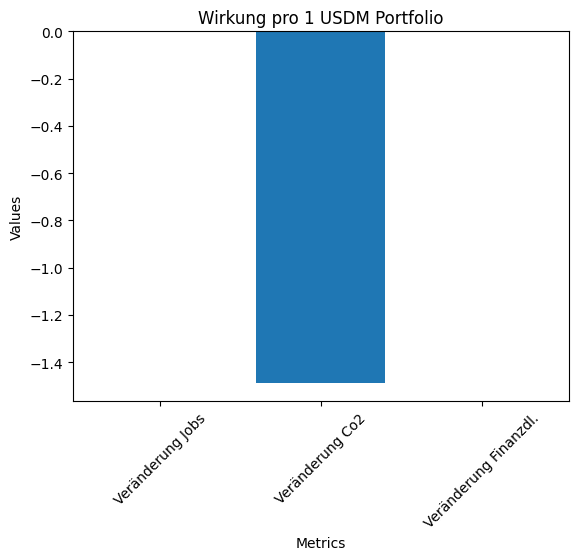

In [127]:
plt.bar(df_sdg_impact['Metrics'], df_sdg_impact['Values'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Wirkung pro 1 USDM Portfolio')
plt.xticks(rotation=45)

plt.show()

Wie schon beim Benchmark gibt es kaum ein Delta bei den Jobs. Hingegen beim CO2 gibt es ca. 1.4 Tonnen Einsparungen. Da kein Finanzdienstleister im Zufallsportfolio vetreten ist, gibt es dort keine Veränderung. Damit wird aufgezeigt, dass mit den vorhandenen Daten eine Wirkungsmessung für die gewählten SDG Ziele durchgeführt werden kann. 

SDG vs. Finanzielle Daten

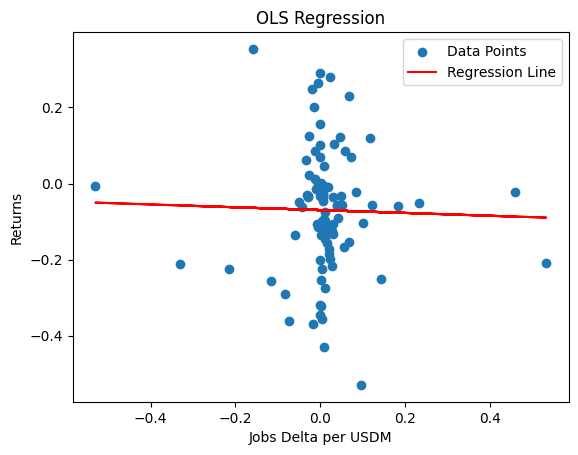

In [128]:
plt.scatter(dfsdg_jobs_return['jobs_delta_perUSDM'], dfsdg_jobs_return['returns'], label='Data Points')
plt.plot(dfsdg_jobs_return['jobs_delta_perUSDM'], dfsdg_jobs_return['predicted_returns'], color='red', label='Regression Line')
plt.xlabel('Jobs Delta per USDM')
plt.ylabel('Returns')
plt.title('OLS Regression')
plt.legend()
plt.show()

Die Analyse hat ergeben, dass nahezu kein linearer Zusammenhang besteht zwischen dem Kreieren von Jobs und des Returns des jeweiligen Unternehmens. Theoretisch müsste ein Zusammenhang bestehen, da erfolgreiche Unternehmen tendenziell eher Jobs kreieren und eine positive Aktienrendite aufweisen. Der in der Untersuchung betrachtete Zeitraum ist zu kurz um ein abschliessendes Fazit zu ziehen. 

### Fazit

Mit dem angewendeten Datenmodell kann die Wirkung der SDG-Indikatoren auf die Aktien gemessen werden.

Grundsätzlich ist zu beachten, dass die Datenbasis nicht ausreichend war und für eine detaillierte Analyse mehr Zeitreihen und mehr Aktien benötigt werden. Zudem ist in der Realität auch von einem gemischten Portfolio auszugehen, denn aufgrund der gewünschten Diversifikation und der Anwendung von Fonds, sind verschiedene Arten von Wertpapieren zu berücksichtigen. 

Das vorliegende Datenmodell bietet jedoch eine gute Grundlage für die Beurteilung und Einordung von Vermögensanlagen und SDG-Indikatoren. 


## Literaturverzeichnis

- Business Intelligence & Analytics – Grundlagen und praktische Anwendungen, Baars H., 3. Auflage, 2021.
- Mit Sustainable Finance die Transformation dynamisieren, Zwick Y, 2023.
- Chartered Professional Accountants of Canada, Internetaufruf am 14. Juni 2023.



## Erklärung

Ich erkläre hiermit, dass ich die vorliegende Arbeit ohne fremde Hilfe und nur unter Be-nützung der angegebenen Quellen verfasst habe, und dass ich ohne schriftliche Zu-stimmung der OST – Ostschweizer Fachhochschule keine Kopien dieser Arbeit an Dritte aushändigen werde.

Ostermundigen, 16. Juni 2023
Marco Reinle

Bern, 16. Juni 2023
Marcel Tschannen

Zürich, 16. Juni 2023
Christin Waeber

###